# E-SHOPPING MARKETING ANALYSIS


El objetivo de proyecto es analizar las ventas de un e-shopping de ropa de maternidad con el fin de mejorar la cultura de datos de la empresa, identificar patrones de compra e incrementar las ventas.

En primer lugar, debemos entender el mercado de la ropa de maternidad, diseñada para mujeres embarazadas. La ropa de maternidad es un segmento del mercado importante dentro de la industria de la moda. El mercado de la ropa de maternidad se caracteriza por tener una demanda estacional. La mayoría de las mujeres la compran durante el segundo y tercer trimestre del embarazo, cuando se experimentan los mayores cambios físicos. 

De manera general es ropa que brinda comodidad a la persona embarazada y que incluye una amplia variedad de prendas, como pantalones, faldas, vestidos, camisetas, blusas, ropa interior y trajes de baño, entre otros. Los materiales suelen ser elásticos y cómodos, como el algodón y la lycra. 

En primer lugar realizaremos la limpieza y preparación de los datos, proseguiremos con un análisis exploratorio y por último, llevaremos a cabo varios modelos supervisados y no supervisados. Entre ellos, se creará un algoritmo de venta cruzada con reglas de asociación que recomiende al cliente otros productos en los que podrían estar interesado según los datos históricos de ventas.

## 1. LIMPIEZA DE DATOS Y ANÁLISIS EXPLORATORIO

## 1.1. Importamos las librerías y decargamos el dataset

In [438]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [439]:
df=pd.read_csv("C:/Users/Paula Pareja/Instalaciones/Desktop/Posgrado Business Analytics/PROYECTO FINAL/e-shop clothing 2008.csv", sep=';')

In [440]:
df
#Tenemos un dataset de 165474 valores y 14 variables

year  month  day  order  country  session ID  page 1 (main category)  \
0       2008      4    1      1       29           1                       1   
1       2008      4    1      2       29           1                       1   
2       2008      4    1      3       29           1                       2   
3       2008      4    1      4       29           1                       2   
4       2008      4    1      5       29           1                       2   
...      ...    ...  ...    ...      ...         ...                     ...   
165469  2008      8   13      1       29       24024                       2   
165470  2008      8   13      1        9       24025                       1   
165471  2008      8   13      1       34       24026                       1   
165472  2008      8   13      2       34       24026                       3   
165473  2008      8   13      3       34       24026                       2   

       page 2 (clothing model)  colour  location  model photography  price  \
0                          A13       1         5                  1     28   
1                          A16       1         6                  1     33   
2                           B4      10         2                  1     52   
3                          B17       6         6                  2     38   
4                           B8       4         3                  2     52   
...                        ...     ...       ...                ...    ...   
165469                     B10       2         4                  1     67   
165470                     A11       3         4                  1     62   
165471                      A2       3         1                  1     43   
165472                      C2      12         1                  1     43   
165473                      B2       3         1                  2     57   

        price 2  page  
0             2     1  
1             2     1  
2             1     1  
3             2     1  
4             1     1  
...         ...   ...  
165469        1     1  
165470        1     1  
165471        2     1  
165472        1     1  
165473        1     1  

[165474 rows x 14 columns]

### Explicación de las variables:
- YEAR: (2008)
- MONTH: from April (4) to August (8)
- DAY: day number of the month
- ORDER: sequence of clicks during one session
- COUNTRY: variable indicating the country of origin of the IP address with the following categories:
    - 1. Australia
    - 2. Austria
    - 3. Belgium
    - 4. British Virgin Islands
    - 5. Cayman Islands
    - 6. Christmas Island
    - 7. Croatia
    - 8. Cyprus
    - 9. Czech Republic
    - 10. Denmark
    - 11. Estonia
    - 12. unidentified
    - 13. Faroe Islands
    - 14. Finland
    - 15. France
    - 16. Germany
    - 17. Greece
    - 18. Hungary
    - 19. Iceland
    - 20. India
    - 21. Ireland
    - 22. Italy
    - 23. Latvia
    - 24. Lithuania
    - 25. Luxembourg
    - 26. Mexico
    - 27. Netherlands
    - 28. Norway
    - 29. Poland
    - 30. Portugal
    - 31. Romania
    - 32. Russia
    - 33. San Marino
    - 34. Slovakia
    - 35. Slovenia
    - 36. Spain
    - 37. Sweden
    - 38. Switzerland
    - 39. Ukraine
    - 40. United Arab Emirates
    - 41. United Kingdom
    - 42. USA
    - 43. biz (*.biz) dominio de Internet genérico (TLD) previsto para ser usado por negocios
    - 44. com (*.com) Internacional
    - 45. int (*.int) int es un dominio de Internet genérico de nivel superior usado en las DNS de Internet. 
             #De acuerdo con la política del IANA, los dominios . int están reservados para organizaciones con tratados internacionales y organizaciones no gubernamentales con el estatus de "observadores" de las Naciones Unidas.
    - 46. net (*.net)
    - 47. org (*.org) #organizaciones
    
- SESSION ID: variable indicating session id (short record)
- PAGE 1 (MAIN CATEGORY): concerns the main product category:
    - 1. trousers
    - 2. skirts
    - 3. blouses
    - 4. sale

- PAGE 2 (CLOTHING MODEL): contains information about the code for each product 
    #217 products
- COLOUR: colour of product
    - 1. beige
    - 2. black
    - 3. blue
    - 4. brown
    - 5. burgundy
    - 6. gray
    - 7. green
    - 8. navy blue
    - 9. of many colors
    - 10. olive
    - 11. pink
    - 12. red
    - 13. violet
    - 14. white

- LOCATION: photo location on the page, the screen has been divided into six parts:
    - 1-top left
    - 2-top in the middle
    - 3-top right
    - 4-bottom left
    - 5-bottom in the middle
    - 6-bottom right

- MODEL PHOTOGRAPHY: variable with two categories: 
    - 1. en face (de frente)
    - 2. profile (de perfil)
    
- PRICE: price in US dollars
- PRICE 2: variable informing whether the price of a particular product is higher than the average price for the entire product category
    - 1. yes
    - 2. no
- PAGE: page number within the e-store website (from 1 to 5)

## 1.2. Limpieza de los datos


In [441]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

El dataset incluye variables como la fecha en el se realizó la compra (año, mes y día), la orden de compra, el país, el ID de la sesión, la categoría del producto, la modelo, el color, la localización, la fotografía, el precio, si el precio está fuera de lo normal, y la página donde se encuentra el producto.

In [442]:
#Viendo el nombre de las variables, considero necesario cambiarlo para hacer más sencillo el desarrollo del proyecto
#Primero sustituimos los espacios por "_"

df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session_ID',
       'page_1_(main_category)', 'page_2_(clothing_model)', 'colour',
       'location', 'model_photography', 'price', 'price_2', 'page'],
      dtype='object')

In [443]:
#A continuación, simplifico los nombres complejos de columnas y cambio a otros más descriptivos para localizarlas fácilmente
df = df.rename(columns={'order': 'clics', 'page_1_(main_category)': 'category', 'page_2_(clothing_model)': 'clothing_code','price_2': 'overpriced'})

In [444]:
df.head(5)

year  month  day  clics  country  session_ID  category clothing_code  \
0  2008      4    1      1       29           1         1           A13   
1  2008      4    1      2       29           1         1           A16   
2  2008      4    1      3       29           1         2            B4   
3  2008      4    1      4       29           1         2           B17   
4  2008      4    1      5       29           1         2            B8   

   colour  location  model_photography  price  overpriced  page  
0       1         5                  1     28           2     1  
1       1         6                  1     33           2     1  
2      10         2                  1     52           1     1  
3       6         6                  2     38           2     1  
4       4         3                  2     52           1     1

In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   year               165474 non-null  int64 
 1   month              165474 non-null  int64 
 2   day                165474 non-null  int64 
 3   clics              165474 non-null  int64 
 4   country            165474 non-null  int64 
 5   session_ID         165474 non-null  int64 
 6   category           165474 non-null  int64 
 7   clothing_code      165474 non-null  object
 8   colour             165474 non-null  int64 
 9   location           165474 non-null  int64 
 10  model_photography  165474 non-null  int64 
 11  price              165474 non-null  int64 
 12  overpriced         165474 non-null  int64 
 13  page               165474 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 17.7+ MB


Todas las variables son numéricas (tipo int) salvo "clothing code" la cual es tipo texto (object). Dicha variable continee el código correspondiente a cada producto.

In [446]:
df.columns

Index(['year', 'month', 'day', 'clics', 'country', 'session_ID', 'category',
       'clothing_code', 'colour', 'location', 'model_photography', 'price',
       'overpriced', 'page'],
      dtype='object')

Después de una primera limpieza, las variables quedarían así:
 - **Year**: año en el que se realizó la compra
 - **Month**: mes en el que se realizó la compra
 - **Day**: día en el que se realizó la compra
 - **Clics**: clics durante una sesión
 - **Country**: país IP
 - **Session ID**: la ID de sesión (que corresponde al ID del cliente)
 - **Category**: categoría del producto (pantalones, faldas, blusas o rebajas)
 - **Clothing_code**: código de cada producto
 - **Colour**: color del producto
 - **Location**: localización dentro de la página (arriba izquierda, medio, y derecho, abajo izquierda, medio o derecha)
 - **Model_photography**: foto de cara o perfil
 - **Price**: precio del producto
 - **Overpriced**: si el precio se encuentra fuera de la media de precios de su categoría
 - **Page**: el número de la página dentro de la página web


Haciendo un primer análisis de las variables con las contamos puedo identificar algunos campos de mejora en la recopilación de datos de la empresa. Deben añadirse algunas variables esenciales para mejorar la cultura de datos: 

 - Hora de la compra: una variable esencial para el lanzamiento de campañas de marketing y análisis del comportamiento del cliente.
 - Tiempo del usuario en la web: si bien aparecen los clics durante la sesión (compra de un producto), no podemos saber ni a qué producto se han realizado esos clics, ni contamos con grabaciones de pantalla para valorar la experiencia de usuario. 
     - Si tuviéramos clics por producto podríamos saber el nivel de interés en el producto y si vende en proporción al interés (si el interés es alto y las ventas son pocas es que existe un problema con el producto en concreto aunque haya demanda o llame la atención).
 - Edad y sexo del comprador: estas variables también son muy importante para analizar los tipos de compradores, hacer clusterizaciones y delimitar el público objetivo de la marca.
 - No compradores: cada fila, registro único, representa una venta con un identificador. Sin embargo, no contamos con ninguna información sobre los usuarios de la web que no han realizado compras. 
     - Esto es una fuente de gran riqueza informativa para el análisis pues nos permitiría analizar el comportamiento de todo el público objetivo, identificar fallos y encontrar oportunidades de venta o mejora de la experiencia de usuario. Podríamos analizar también el comportamiento del comprador a lo largo del tiempo (si entra muchas veces en la web antes de comprar o no, por ejemplo).
 - Explicación de las diferentes páginas de la web:
     - Sin entender cómo está estructurada la web es difícil realizar un análisis exhaustivo de marketing del e-commerce. Esta es gran limitación del proyecto actual.
 - Número de cliente o algún identificador (correo o usuario, por ejemplo). El número de sesión nos permite analizar los patrones de compra por productos que se compran conjuntamente. Sin embargo, no podemos analizar la frecuencia de compra y otras métricas esenciales para el marketing. Además podría de este modo estudiarse el patrón de conducta y hacer clusters de clientes ya que contaríamos con las visitas a la web del usuario y cuál es el tiempo hasta la realización de la compra.  
 

Todo esto se podría obtener a través de herramientas como Google Analytics e incomporar en nuestra base de datos para futuros análisis. Teniendo en cuenta esto, proseguiremos con la limpieza de los datos.

In [337]:
# En primer lugar, verificamos si hay valores nulos
df.isnull().sum()

year                 0
month                0
day                  0
clics                0
country              0
session_ID           0
category             0
clothing_code        0
colour               0
location             0
model_photography    0
price                0
overpriced           0
page                 0
dtype: int64

En este dataset no hay ningún valor perdido. 

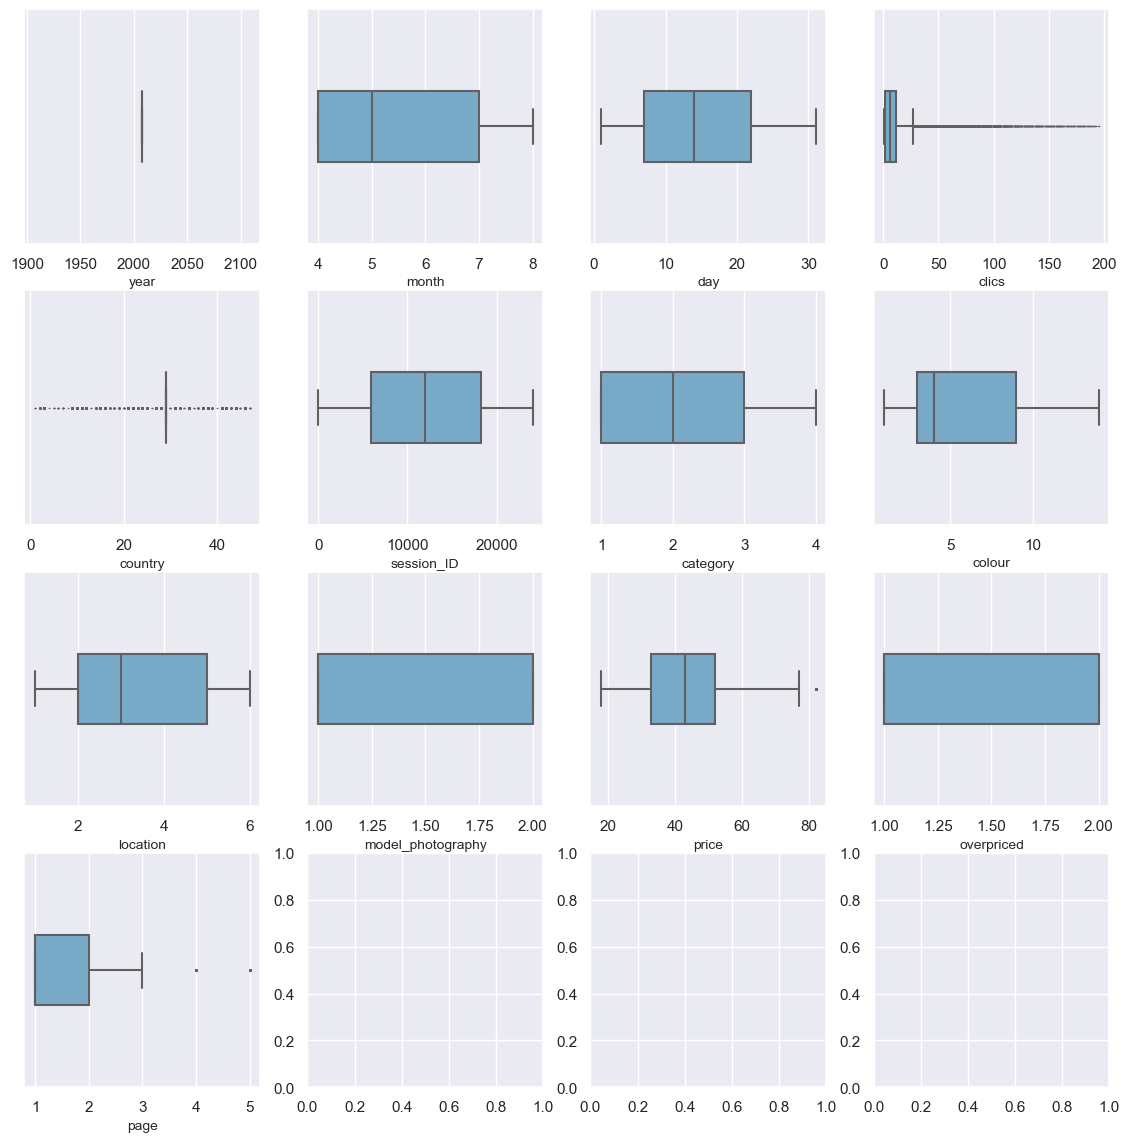

In [338]:
#A continuación verificamos si hay valores atípicos
#Para ello en primer lugar vamos a quedarnos solo con las variables numéricas
dfnum = df.drop(columns = ['clothing_code'])

#Lo representaremos para poder ver si hay outliers 
fig,ax= plt.subplots(ncols=4,nrows=4,figsize=(14, 14)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()):
    boxdetails = sns.boxplot(x = dfnum[variable], ax=subplot, palette="Blues", width=0.3, fliersize=0.3) 
    boxdetails.set_xlabel(variable, fontsize = 10)
plt.show()

Con esto podemos ver que solo tiene sentido analizar si hay valores atípicos en algunas de las variables. 
De hecho, en nuestro dataset solo tiene sentido analizar si hay valores atípicos en el precio y en clics.
Lo he considerado así porque en la mayoría de las variables son categóricas. En el caso de categoria del producto hay cuatro (pantalones, faldas, blusas, ofertas).
<br>
Respecto a las siguientes variables:
- País: tendremos que analizarla más detalladamente, pero no son outliers lo que aparece en la gráfica.
- Página: solo tiene cinco categorías, aunque la 4 y la 5 aparezcan como outliers esto solo revela que se han vendido pocos productos en estas páginas.

## 1.3. Análisis de cada variable

### Fecha

In [447]:
df.year.describe()

count    165474.0
mean       2008.0
std           0.0
min        2008.0
25%        2008.0
50%        2008.0
75%        2008.0
max        2008.0
Name: year, dtype: float64

In [448]:
df.month.describe()

count    165474.000000
mean          5.585887
std           1.328160
min           4.000000
25%           4.000000
50%           5.000000
75%           7.000000
max           8.000000
Name: month, dtype: float64

In [449]:
df.day.describe()

count    165474.000000
mean         14.524554
std           8.830374
min           1.000000
25%           7.000000
50%          14.000000
75%          22.000000
max          31.000000
Name: day, dtype: float64

Los datos corresponden a la temporada de abril a agosto de 2008. Debemos tener en cuenta el año, en primer lugar, ya que la economía global se estaba viendo sumergida en una gran crisis bancaria. La inflación hizo que los productos se encarecieran y la crisis hizo disminuir la demanda pues las personas necesitaban ahorros y gastaban menos dinero en ropa. Sin embargo, teniendo en cuenta que es ropa de maternidad, es un producto "necesario" en el que no se ve afectado de la misma forma la escasez de dinero.

Vamos a analizar con mayor detalle las compras dentro del mes y día:

In [450]:
#Transformo en otro df la variable month en categórica para visualizarla correctamente

dfmonth = df.copy()
dfmonth['month'] = dfmonth['month'].astype('category')

In [451]:
dfmonth.dtypes

year                    int64
month                category
day                     int64
clics                   int64
country                 int64
session_ID              int64
category                int64
clothing_code          object
colour                  int64
location                int64
model_photography       int64
price                   int64
overpriced              int64
page                    int64
dtype: object

[Text(0.5, 1.0, 'Ventas mensuales')]

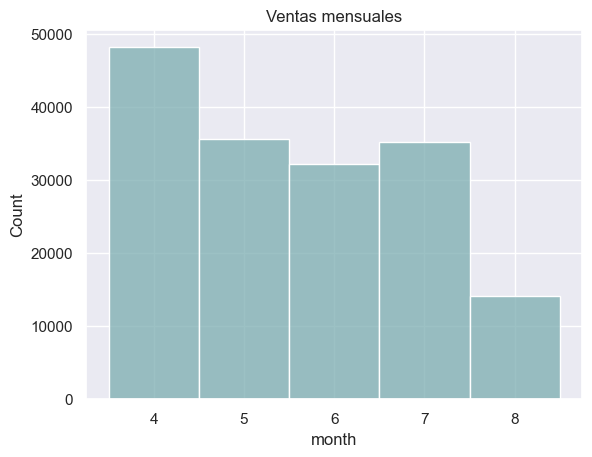

In [452]:
sns.histplot(data=dfmonth, x='month',color='#7BADB0').set(title='Ventas mensuales')

- El mes de abril fue en el que hubo mayores ventas y agosto en el que menos (con gran diferencia)
- Los meses de mayo, junio y julio se mantuvieron estables, con una pequeña caída en junio.

Si observáramos los datos históricos de otros años, tomaríamos nota de las épocas del año en las que los productos se compran con más frecuencia y si hubiera un patrón discernible, podríamos tener las temporadas claramente definidas y ser capaz de formular estrategias de venta en torno a estos periodos de tiempo. Sin embargo, al tener solo cuatro meses en nuestro histórico, solo podemos hacer deducciones según la estacionalidad de ventas del mercado de ropa de maternidad. 

Como dijimos anteriormente, la ropa de maternidad tiene una demanda estacional (segundo y tercer trimestre del embarazo). Por ende, es importante entender el contexto demográfico del país y los meses con mayores nacimientos para calcular las variaciones de la demanda de los productos. Según el Instituto Central de Estadística de Polonia, los meses con tasas de nacimiento más altos son julio, agosto y septiembre, mientras los que menos son febrero y noviembre. Teniendo en cuenta que la ropa de maternidad se compra en los dos últimos trimestres, eso significaría que los meses con mayores ventas son los seis anteriores. Por ende, si los meses con menores nacimientos son febrero y noviembre, esto explicaría que en agosto, septiembre y octubre así como en noviembre diciembre y enero habrá menos ventas que desde enero a agosto. 

Asímismo, la ropa de maternidad varía dependiendo de la temporada, las tendencias de moda, la economía y otros factores. Tendríamos que investigar en detalle si la caída progresiva en ventas, sobre todo en el mes de agosto, se debió en parte a lo explicado anteriormente, a una disminución de ropa de maternidad en general, disminución en marketing y publicidad, o una mayor competencia en el mercado, entre otros. De nuevo, sería esencial recopilar datos de otros años para ver si es una tendencia estacional o no.

Vamos a analizar las ventas por tipo de producto:

In [453]:
#Voy a crear una tabla con cada mes y sus ventas en precio
category = df.groupby('month')['month','category'].value_counts()
category

C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_5420\2981898206.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category = df.groupby('month')['month','category'].value_counts()


month  category
4      1           14314
       4           11584
       3           11287
       2           11014
5      1           10942
       2            8951
       3            8417
       4            7344
6      1            9491
       2            8263
       3            7770
       4            6718
7      1           10871
       4            9120
       3            7858
       2            7382
8      1            4124
       4            3981
       3            3245
       2            2798
dtype: int64

- Siendo las categorías trousers (1), skirts (2), blouses (3) y sale (4), podemos observar que se venden más pantalones y faldas
- En los meses de mayo y junio se venden menos rebajas

Vamos a visualizarlo para verlo más fácilmente:

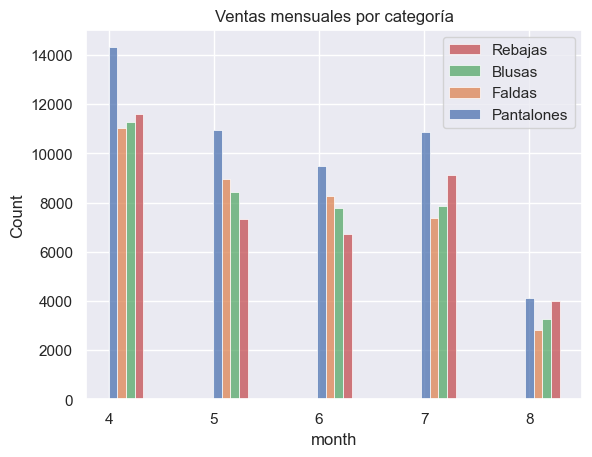

In [454]:
sns.histplot(data=df, x='month', color='darkblue', binwidth= 0.33, palette = 'deep',
             multiple='dodge', hue='category', linewidth=0.5).set(title='Ventas mensuales por categoría')
plt.legend(['Rebajas', 'Blusas', 'Faldas', 'Pantalones'])

- En la gráfica visualizamos muy bien la diferencia en la venta de pantalones frente a las demás categorías
- También se puede observar como suben las ventas de rebajas en abril, julio y agosto
- Resulta curioso que cuando suben las ventas de productos en oferta también lo hacen la venta de blusas

Posteriomente analizaremos más en detalle las diferentes variables en su temporalidad.

[Text(0.5, 1.0, 'Ventas diarias')]

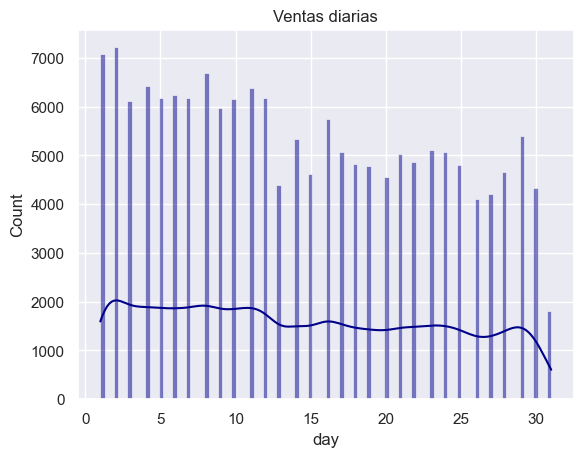

In [455]:
#Análisis de la temporalidad de ventas por días
sns.histplot(data=df, x='day',color='darkblue', kde=True,
             bins=62, binwidth= 0.3, linewidth=0.4).set(title='Ventas diarias')

- Podemos observar una tendencia decreciente en las ventas mensuales. 
- Esto es bastante común pues los clientes realizan la compra a principios de mes, cuando reciben el salario y tienen más cantidad de dinero. 
- El día 31 es el que tiene ventas más bajas pero esto se debe a que no todos los meses tienen 31 días. 


A continuación, vamos a pasar la fecha a días de la semana para analizar los patrones de compra semanales: 

In [456]:
#Creo que es más interesante combinar las celdas mes día año en una sola columna de fecha
#Aún así dejaré las columnas mes día año para analizarlas al detalle y por si necesito celdas numéricas para el análisis
df['date'] = df['month'] + df['day'] + df['year']
df['date'] = pd.to_datetime(df[['month', 'day', 'year']])

In [457]:
df.head(5)

year  month  day  clics  country  session_ID  category clothing_code  \
0  2008      4    1      1       29           1         1           A13   
1  2008      4    1      2       29           1         1           A16   
2  2008      4    1      3       29           1         2            B4   
3  2008      4    1      4       29           1         2           B17   
4  2008      4    1      5       29           1         2            B8   

   colour  location  model_photography  price  overpriced  page       date  
0       1         5                  1     28           2     1 2008-04-01  
1       1         6                  1     33           2     1 2008-04-01  
2      10         2                  1     52           1     1 2008-04-01  
3       6         6                  2     38           2     1 2008-04-01  
4       4         3                  2     52           1     1 2008-04-01

In [458]:
# Obtener el día de la semana y crear una nueva columna en el DataFrame
weekday_dict = {0: 'lunes', 1: 'martes', 2: 'miércoles', 3: 'jueves', 4: 'viernes', 5: 'sábado', 6: 'domingo'}
df['day_week'] = df['date'].apply(lambda x: weekday_dict[x.weekday()])


In [459]:
df.head(5)

year  month  day  clics  country  session_ID  category clothing_code  \
0  2008      4    1      1       29           1         1           A13   
1  2008      4    1      2       29           1         1           A16   
2  2008      4    1      3       29           1         2            B4   
3  2008      4    1      4       29           1         2           B17   
4  2008      4    1      5       29           1         2            B8   

   colour  location  model_photography  price  overpriced  page       date  \
0       1         5                  1     28           2     1 2008-04-01   
1       1         6                  1     33           2     1 2008-04-01   
2      10         2                  1     52           1     1 2008-04-01   
3       6         6                  2     38           2     1 2008-04-01   
4       4         3                  2     52           1     1 2008-04-01   

  day_week  
0   martes  
1   martes  
2   martes  
3   martes  
4   martes

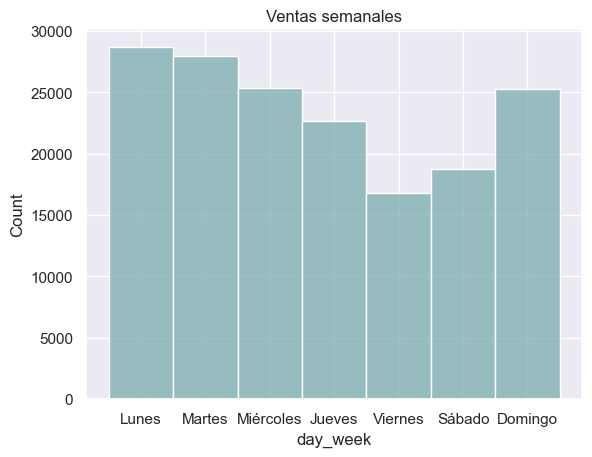

In [460]:
sns.histplot(data=df, x='day_week',color='#7BADB0').set(title='Ventas semanales')
plt.xticks(np.arange(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']);


Según la gráfica anterior:
- Se puede observar una tendencia decreciente desde el lunes hasta el viernes.
    - Los lunes pueden ser el momento en que las personas tienen más energía y entusiasmo para comenzar la semana con buen pie, lo que puede llevarlas a hacer compras en línea. Además, después de un fin de semana de descanso, es posible que las personas sientan la necesidad de comprar ropa nueva para comenzar la semana laboral con una actitud fresca y renovada. 
    - Por otro lado, a medida que avanzan los días de la semana, las personas pueden tener menos tiempo o energía para hacer compras en línea debido a sus compromisos laborales y personales. También pueden estar preocupadas por la entrega de los productos antes del fin de semana, especialmente si la tienda en línea no ofrece envío rápido. Esto puede llevar a una disminución en las ventas a lo largo de la semana.
    - Otra posible explicación es que los minoristas pueden ofrecer promociones especiales y descuentos en ciertos días de la semana para atraer a los compradores. Los lunes pueden ser el día en que se lanzan estas promociones
- En cuanto a la mayor cantidad de ventas los domingos, esto puede deberse a que las personas tienen más tiempo libre para comprar en línea los domingos, que es un día de descanso para muchas personas. Además, pueden estar buscando ofertas de último minuto antes del comienzo de la semana laboral. 

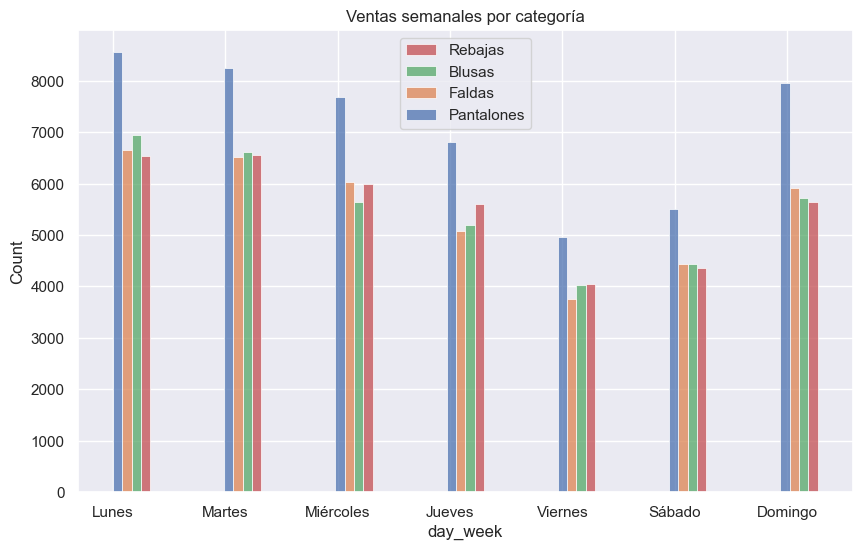

In [461]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='day_week', color='darkblue', binwidth=0.33, 
             hue='category', element='bars', multiple='dodge', palette = 'deep',
             linewidth=0.5, discrete=False).set(title='Ventas semanales por categoría')
plt.xticks(np.arange(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.legend(['Rebajas', 'Blusas', 'Faldas', 'Pantalones'])


Según la gráfica anterior podemos observar diferentes patrones de compra semanales según la categoría del producto: 
- La venta de pantalones es mucho mayor que el resto 
- Las blusas se compran por encima de las faldas y los productos en rebajas los lunes y los martes, sin embargo esta diferencia no es tan notoria los otros días de la semana. 
- Los miércoles y jueves se venden más productos en rebaja que faldas y blusas.


In [462]:
df.head(5)

year  month  day  clics  country  session_ID  category clothing_code  \
0  2008      4    1      1       29           1         1           A13   
1  2008      4    1      2       29           1         1           A16   
2  2008      4    1      3       29           1         2            B4   
3  2008      4    1      4       29           1         2           B17   
4  2008      4    1      5       29           1         2            B8   

   colour  location  model_photography  price  overpriced  page       date  \
0       1         5                  1     28           2     1 2008-04-01   
1       1         6                  1     33           2     1 2008-04-01   
2      10         2                  1     52           1     1 2008-04-01   
3       6         6                  2     38           2     1 2008-04-01   
4       4         3                  2     52           1     1 2008-04-01   

  day_week  
0   martes  
1   martes  
2   martes  
3   martes  
4   martes

### País

In [464]:
df.country.describe()

count    165474.000000
mean         26.952621
std           7.150691
min           1.000000
25%          29.000000
50%          29.000000
75%          29.000000
max          47.000000
Name: country, dtype: float64

Podemos ver que hay 47 países (o IPs). El percentil 25, 50 y 75 es 29, esto muestra que se vendieron desproporcionalmente más productos en el país número 29 que equivale a Polonia. 

[Text(0.5, 1.0, 'Ventas por país')]

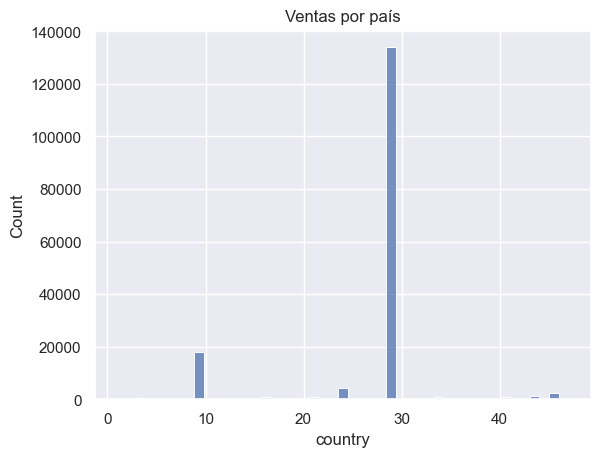

In [465]:
sns.histplot(data=df, x='country', palette="Blues", bins=47).set(title='Ventas por país')

No tiene sentido quitar outliers, cuando lo representamos todos son outliers pues todos se repiten muy poco menos tres de ellos.

#### Los países nº 29 (133963), 9 (18003), 24 (4091) son aquellos en los que ha habido más ventas, correspondientes a Polonia, Republica Checa, y Lithuania. Además, las páginas .net y .com aparecen con mayor frecuencia. En estas últimas desconocemos cuál es la dirección IP concreta. 

Si bien podríamos considerar los países que aparecen menos de 10 veces, por ejemplo.

Esto eliminaría el número 45 y 47, referido a organismos internacionales y organizaciones. Puede ser interesante incluirlo en el análisis por lo que no eliminaremos estos países. Aún así se me plantea la duda de si 7 ventas son relevantes o puede comprometer el análisis, cuando tenemos un total de 165000 ventas. Por el momento voy a dejarlas y más adelante en el desarrollo de los modelos veré si debo eliminar estos países. 

Los demás países tienen menos de 1000 ventas, incluso muchos tienen menos de 50. Vamos a ver cuáles son y a crear una tabla con ventas mayores a 1000, entre 1000 y 50 y menores que 50.

In [475]:
df_country = df.groupby('country')['country'].value_counts()
df_country

country  country
1        1               3
2        2              58
3        3             256
4        4               1
5        5               4
6        6               5
7        7               9
8        8               1
9        9           18003
10       10            152
11       11            115
12       12            210
13       13              2
14       14             43
15       15            125
16       16            834
17       17             23
18       18             18
19       19             29
20       20             10
21       21            811
22       22            144
23       23             46
24       24           4091
25       25             71
26       26              2
27       27            227
28       28            139
29       29         133963
30       30              5
31       31            144
32       32             49
33       33              3
34       34            716
35       35              3
36       36             19
37       37

In [476]:
country1 = pd.DataFrame(data=df_country.index, columns=['country'])
country2 = pd.DataFrame(data=df_country.values, columns=['sale'])
df_country = pd.merge(country1, country2, left_index=True, right_index=True)

In [477]:
df_country

country    sale
0     (1, 1)       3
1     (2, 2)      58
2     (3, 3)     256
3     (4, 4)       1
4     (5, 5)       4
5     (6, 6)       5
6     (7, 7)       9
7     (8, 8)       1
8     (9, 9)   18003
9   (10, 10)     152
10  (11, 11)     115
11  (12, 12)     210
12  (13, 13)       2
13  (14, 14)      43
14  (15, 15)     125
15  (16, 16)     834
16  (17, 17)      23
17  (18, 18)      18
18  (19, 19)      29
19  (20, 20)      10
20  (21, 21)     811
21  (22, 22)     144
22  (23, 23)      46
23  (24, 24)    4091
24  (25, 25)      71
25  (26, 26)       2
26  (27, 27)     227
27  (28, 28)     139
28  (29, 29)  133963
29  (30, 30)       5
30  (31, 31)     144
31  (32, 32)      49
32  (33, 33)       3
33  (34, 34)     716
34  (35, 35)       3
35  (36, 36)      19
36  (37, 37)     163
37  (38, 38)     137
38  (39, 39)      34
39  (40, 40)       1
40  (41, 41)     684
41  (42, 42)     170
42  (43, 43)      31
43  (44, 44)    1385
44  (45, 45)       6
45  (46, 46)    2522
46  (47, 47)       7

In [478]:
df_country['countryname'] = ["Australia", "Austria", "Belgium", "British Virgin Islands",
                             "Cayman Islands", "Christmas Island", "Croatia", "Cyprus",
                             "Czech Republic", "Denmark", "Estonia", "unidentified", 
                             "Faroe Islands", "Finland", "France", "Germany", "Greece",
                             "Hungary", "Iceland", "India", "Ireland", "Italy", "Latvia", 
                             "Lithuania", "Luxembourg", "Mexico", "Netherlands", "Norway",
                             "Poland", "Portugal", "Romania", "Russia", "San Marino", "Slovakia",
                             "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", 
                             "United Arab Emirates", "United Kingdom", "USA", ".biz",
                             ".com", ".int", ".net", ".org"]

In [479]:
df_country.tail(10)

country  sale           countryname
37  (38, 38)   137           Switzerland
38  (39, 39)    34               Ukraine
39  (40, 40)     1  United Arab Emirates
40  (41, 41)   684        United Kingdom
41  (42, 42)   170                   USA
42  (43, 43)    31                  .biz
43  (44, 44)  1385                  .com
44  (45, 45)     6                  .int
45  (46, 46)  2522                  .net
46  (47, 47)     7                  .org

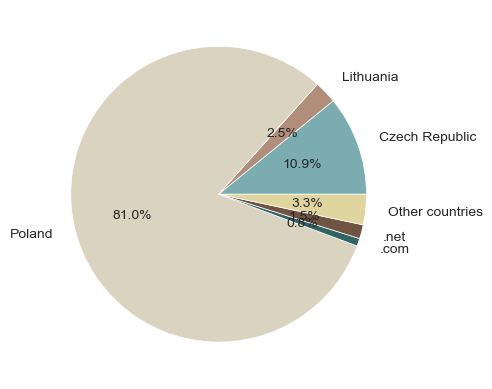

In [480]:
# find countries with less than 50 sales

other_sales = df_country.loc[df_country['sale'] < 1000, 'sale'].sum()

# combine into new DataFrame
df_combined = pd.concat([
    df_country.loc[df_country['sale'] >= 1000],
    pd.DataFrame({'country': ['Others'], 'sale': [other_sales]})
])
df_combined['countryname'] = df_combined['countryname'].fillna('Other countries')


# Create a set of colors
colors = ['#7BADB0', '#B08E7B', '#DAD3BF', '#326363','#705443','#DFD59F']

# Use it thanks to the color argument
plt.pie(df_combined['sale'], labels=df_combined['countryname'], labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 0.5, 'edgecolor' : 'white' }, colors=colors, autopct='%1.1f%%',
        textprops={'fontsize': 10});

In [481]:
df_country.columns

Index(['country', 'sale', 'countryname'], dtype='object')

In [482]:
#Para ello, creamos un dataset que atribuya las categorías a los valores según si son 
#"más de 1000 ventas", "entre 50 y 1000 ventas", "menos de 50 ventas"

#Creamos una nueva variable con estas tres categorías
df_country['level_sale'] = pd.cut(df_country.sale,bins=[0,50,500,10000000],labels=["Menos de 50", "50-500 productos","Más de 500"])

In [484]:
df_country.head(5)

country  sale             countryname        level_sale
0  (1, 1)     3               Australia       Menos de 50
1  (2, 2)    58                 Austria  50-500 productos
2  (3, 3)   256                 Belgium  50-500 productos
3  (4, 4)     1  British Virgin Islands       Menos de 50
4  (5, 5)     4          Cayman Islands       Menos de 50

In [487]:
df_country.groupby('level_sale')['level_sale'].count()

level_sale
Menos de 50         24
50-500 productos    14
Más de 500           9
Name: level_sale, dtype: int64

[Text(0.5, 1.0, 'Nivel de venta por país')]

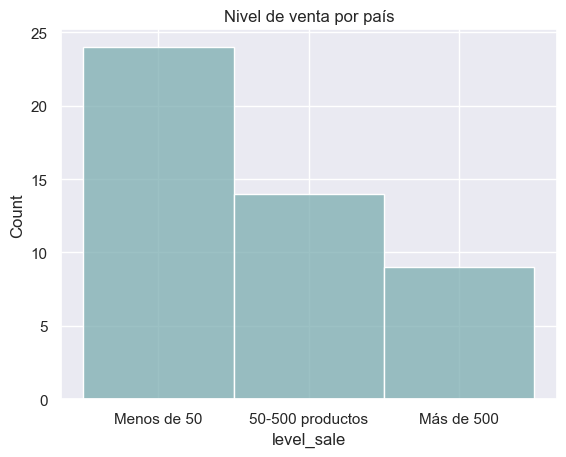

In [488]:
sns.histplot(data=df_country, x='level_sale', bins=30, color='#7BADB0').set(title='Nivel de venta por país')

- Podemos apreciar que tan solo 5 países tienen ventas mayores a 1000 productos en el tiempo analizado
- La mayoría de los países (un total de 24) han vendido menos de 50 productos
- 18 países han vendido entre 50 y 1000 productos

Esto es especialmente relevante a la hora de lanzar campañas publicitarias, por ejemplo, de captación de nuevos clientes. Sin embarbo, debemos tener en cuenta que esta base de datos solo tiene en cuenta desde abril a agosto de 2008. Por ende, deberíamos tener datos históricos para sacar conclusiones precisas. Puede que la compra varíe mucho en un país en diferentes épocas del año, sobre todo considerando que se trata de una tienda de ropa y que puede haber mayores variacones de clima y comportamientos de compra en diferentes países. 
Viendo la gráfica anterior las recomendaciones a priori para el enfoque del marketing serían las siguientes: 
- Centrar las campañas publicitarias en los 3 países con mayores ventas (principalmente en Polonia).
- Investigar las necesidades y demanda en los países con venta media, por qué no se están vendiendo más (cuestión de tiempo, página web, falta de inversión en campañas,etc.). Quizás el producto, la web o el packaging no están adaptados a la cultura del país. Por ende, si se encuentra un importante hueco de mercado en algún país podríamos plantearnos la adaptación de la web y productos para ese país en concreto. Asimismo, siendo un e-commerce de ropa de maternidad, es importante tener en cuenta la natalidad de los diferentes países ya que puede ser una oportunidad si localizamos necesidades y adaptamos el producto al contexto del país. 
- Para aquellas con venta baja (menos de 50 productos), dejar que las compras sigan las demandas de mercado. Para un uso efectivo del presupuesto nos centraremos en países con ventas altas y medias y una vez asentadas haríamos investigaciones de mercado en otros países para encontrar huecos y aumentar las venas. 

In [489]:
#Vamos a analizar los tres países con mayores ventas (Polonia, Republica Checa, Lithuania)
 #Primero creo una nueva tabla con estos países

top3countries = df[(df["country"] == 9) | (df["country"] == 24) | (df["country"] == 29)]

In [490]:
top3countries.head(5)

year  month  day  clics  country  session_ID  category clothing_code  \
0  2008      4    1      1       29           1         1           A13   
1  2008      4    1      2       29           1         1           A16   
2  2008      4    1      3       29           1         2            B4   
3  2008      4    1      4       29           1         2           B17   
4  2008      4    1      5       29           1         2            B8   

   colour  location  model_photography  price  overpriced  page       date  \
0       1         5                  1     28           2     1 2008-04-01   
1       1         6                  1     33           2     1 2008-04-01   
2      10         2                  1     52           1     1 2008-04-01   
3       6         6                  2     38           2     1 2008-04-01   
4       4         3                  2     52           1     1 2008-04-01   

  day_week  
0   martes  
1   martes  
2   martes  
3   martes  
4   martes

In [491]:
top3countries.groupby('country')['country'].value_counts()

country  country
9        9           18003
24       24           4091
29       29         133963
Name: country, dtype: int64

In [492]:
top3countries.groupby(['country','category'])['country'].count()

country  category
9        1            8262
         2            4103
         3            5531
         4             107
24       1            1352
         2             885
         3             997
         4             857
29       1           37145
         2           31123
         3           29611
         4           36084
Name: country, dtype: int64

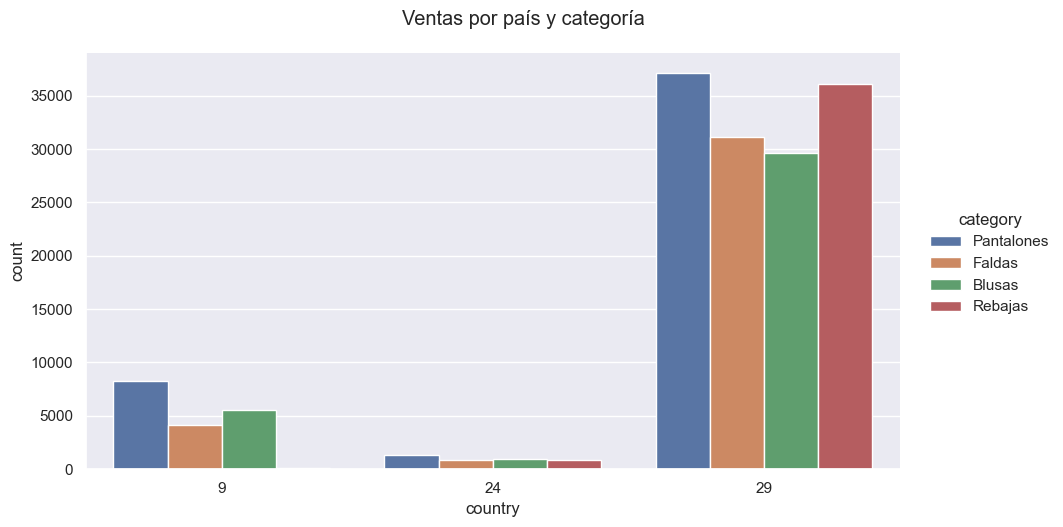

In [493]:
plot = sns.catplot(data=top3countries, x='country', kind='count', hue='category', palette='deep', aspect=2)
plot.fig.suptitle('Ventas por país y categoría', y=1.05)
new_labels = ['Pantalones', 'Faldas', 'Blusas', 'Rebajas']
for t, l in zip(plot._legend.texts, new_labels):
    t.set_text(l)
x_labels = ['Poland', 'Check Republic', 'Lithuania']

#La leyenda quedaba por encima del label "29" por lo que he añadido espacio entre ambas:
plt.subplots_adjust(right=0.85)

- Existe una gran diferencia en las ventas del país 29, Polonia, donde se venden mayoritariamente pantalones y productos en rebajas
- A continuación, el país 9, República Checa también se venden más pantalones y luego blusas
    - Me parece extraño que no aparezca ningún producto en rebajas en este país.
- Siguiendo la tendencia general, en el país 24, Lithuania, también se venden más pantalones

Text(0.5, 1.05, 'Ventas por categoría - República Checa')

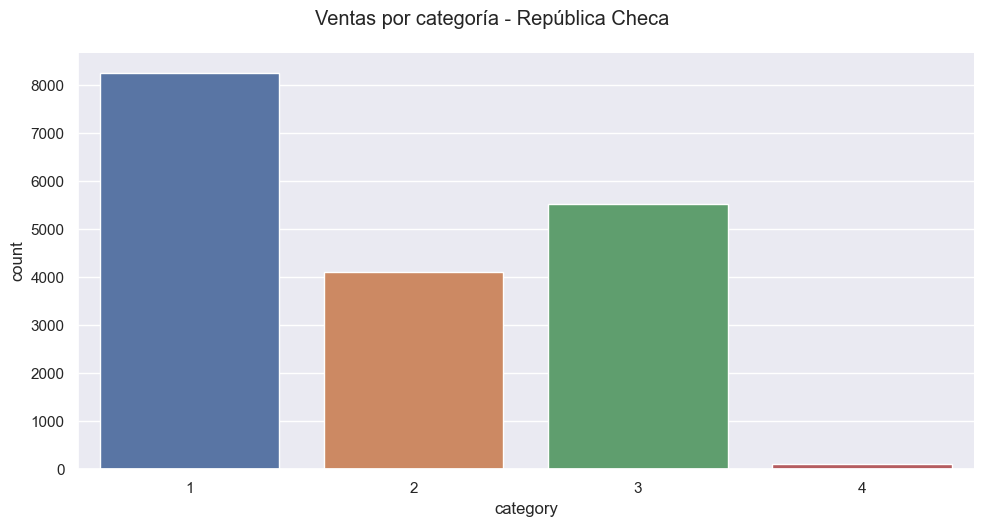

In [494]:
country9 = top3countries.query('country == 9')

plot = sns.catplot(data=country9, x='category', kind='count', palette='deep', aspect=2)
plot.fig.suptitle('Ventas por categoría - República Checa', y=1.05)

#Parece que son mínimas, por lo que en este país no tienen tanta práctica de comprar rebajas. 

In [495]:
sales_country9 = df[(df['category'] == 'sales') & (df['country'] == 9)]
num_rows = sales_country9.shape[0]
print(f"El número de ventas para la categoría rebajas en República Checa es: {num_rows}")

El número de ventas para la categoría rebajas en República Checa es: 0


Hay varios factores que pueden influir en que en la República Checa no se vendan tantos productos en rebajas: 
- Puede que las rebajas no sean una práctica muy común en el país, por lo que los consumidores no estén tan acostumbrados a buscar ofertas y descuentos.
- Pueden existir diferencias culturales hacia el gasto y los patrones de compra. Es posible que tengan alta temporalidad y las personas no estén acostumbradas a buscar ofertas en los meses capturados. 

### Cliente ID de sesión


In [496]:
df.session_ID.nunique()
#Hay 24026 sesiones diferentes

24026

TypeError: 'str' object is not callable

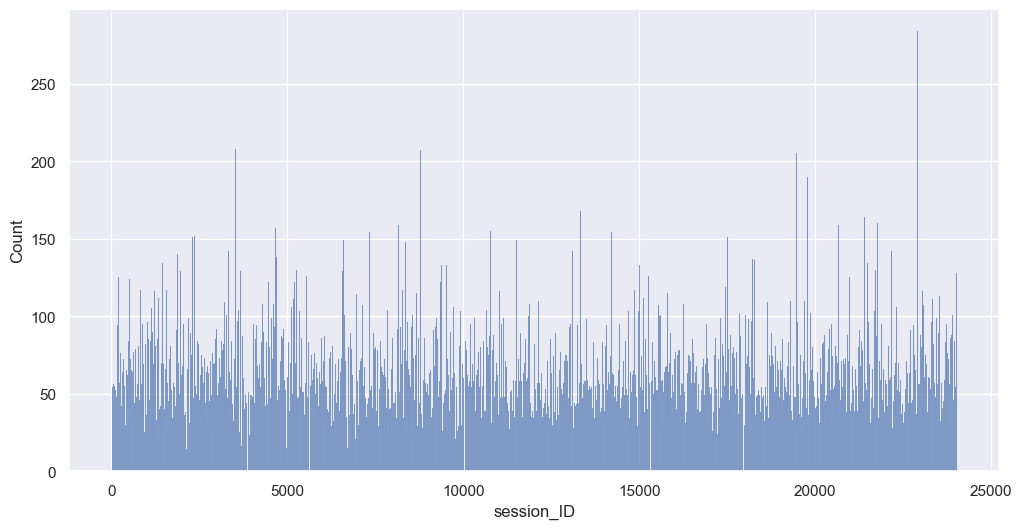

In [498]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='session_ID', bins=2400)
plt.title('Compras por usuario')
plt.xlabel('ID de sesión')
plt.ylabel('Productos comprados')
plt.show()

- Esto resulta muy interesante ya que nos desvela que casi todos los usuarios han comprado menos de 50 productos
- Hay uno de los usuarios que ha comprado más de 250 productos
- Hay bastantes usuarios que podríamos considerar como vip pues han comprado más de 100 productos en los 4 meses
- Tendríamos que analizar si son particulares o empresas para delimitar el público objetivo

In [499]:
ID = df.groupby('session_ID')['session_ID'].value_counts()
ID

session_ID  session_ID
1           1              9
2           2             10
3           3              6
4           4              4
5           5              1
                          ..
24022       24022          3
24023       24023          7
24024       24024          1
24025       24025          1
24026       24026          3
Name: session_ID, Length: 24026, dtype: int64

In [500]:
ID1 = pd.DataFrame(data=ID.index, columns=['session_ID'])
ID2 = pd.DataFrame(data=ID.values, columns=['count'])
IDcount = pd.merge(ID1, ID2, left_index=True, right_index=True)

In [501]:
IDcount.columns = ['session_ID', 'Productos comprados']
IDcount

#El número de veces que aparece un ID de sesión equivale al número de productos comprados en una misma sesión

session_ID  Productos comprados
0              (1, 1)                    9
1              (2, 2)                   10
2              (3, 3)                    6
3              (4, 4)                    4
4              (5, 5)                    1
...               ...                  ...
24021  (24022, 24022)                    3
24022  (24023, 24023)                    7
24023  (24024, 24024)                    1
24024  (24025, 24025)                    1
24025  (24026, 24026)                    3

[24026 rows x 2 columns]

In [502]:
precioporcliente = df.groupby('session_ID')['price'].sum()
ID = df.groupby('session_ID')['session_ID'].value_counts()
cliente = pd.merge(precioporcliente, ID, left_index=True, right_index=True)
cliente

price  session_ID
session_ID session_ID                   
1          1             379           9
2          2             500          10
3          3             253           6
4          4             181           4
5          5              57           1
...                      ...         ...
24022      24022          89           3
24023      24023         246           7
24024      24024          67           1
24025      24025          62           1
24026      24026         143           3

[24026 rows x 2 columns]

In [503]:
cliente['ID'] = np.arange(1, len(cliente) + 1)
cliente

price  session_ID     ID
session_ID session_ID                          
1          1             379           9      1
2          2             500          10      2
3          3             253           6      3
4          4             181           4      4
5          5              57           1      5
...                      ...         ...    ...
24022      24022          89           3  24022
24023      24023         246           7  24023
24024      24024          67           1  24024
24025      24025          62           1  24025
24026      24026         143           3  24026

[24026 rows x 3 columns]

In [504]:
cliente.rename(columns={'session_ID': 'n_products', 'price':'spend'}, inplace=True)

In [505]:
cliente

spend  n_products     ID
session_ID session_ID                          
1          1             379           9      1
2          2             500          10      2
3          3             253           6      3
4          4             181           4      4
5          5              57           1      5
...                      ...         ...    ...
24022      24022          89           3  24022
24023      24023         246           7  24023
24024      24024          67           1  24024
24025      24025          62           1  24025
24026      24026         143           3  24026

[24026 rows x 3 columns]

In [506]:
cliente = cliente[['ID', 'n_products', 'spend']]
cliente

ID  n_products  spend
session_ID session_ID                          
1          1               1           9    379
2          2               2          10    500
3          3               3           6    253
4          4               4           4    181
5          5               5           1     57
...                      ...         ...    ...
24022      24022       24022           3     89
24023      24023       24023           7    246
24024      24024       24024           1     67
24025      24025       24025           1     62
24026      24026       24026           3    143

[24026 rows x 3 columns]

In [507]:
cliente.reset_index(drop=True, inplace=True)

In [508]:
cliente

ID  n_products  spend
0          1           9    379
1          2          10    500
2          3           6    253
3          4           4    181
4          5           1     57
...      ...         ...    ...
24021  24022           3     89
24022  24023           7    246
24023  24024           1     67
24024  24025           1     62
24025  24026           3    143

[24026 rows x 3 columns]

Nos quedaríamos con esta tabla en la que hemos conseguido cada sesión, con el número de productos comprados y el dinero total gastado. Con esto podemos calcular precio medio por sesión, número de productos comprados así como aplicar modelos de asociación posteriormente e incrementar los beneficios a través de la venta cruzada. 

Tras el análisis de sesión, las conclusiones son las siguientes:
- Productos comprados
    - Cada cliente ha comprado de media en cada sesión 6.8 productos. Sin embargo como uno ha comprado 195 productos se compromete un poco esta cifra. El percentil 50 ha comprado unos 5 productos y el percentil 75 unos 8 productos
- Dinero gastado: 
    - El máximo de dinero gastado por sesión es 8538 euros. Lo más seguro es que sea empresa, aunque hemos visto que los precios no varían para el mismo producto por lo que no tiene servicios diferenciados B2C y B2B. Es extraño que una empresa compre al precio normal de venta tanta cantidad de productos. 
    - Al ser una tienda de ropa se deberían hacer descuentos por lote o precios diferenciados para empresas y usuarios. 
    - El precio medio por cliente es 300 euros 
    - El percentil 50 es 177 euros y el percentil 75 unos 375

In [509]:
IDnumcompras = cliente.groupby('n_products')['n_products'].value_counts()

In [510]:
IDnumcompras.head(10)

n_products  n_products
1           1             5042
2           2             3320
3           3             2620
4           4             2037
5           5             1597
6           6             1398
7           7             1117
8           8              934
9           9              749
10          10             648
Name: n_products, dtype: int64

- En 5042 sesiones se compraron solo 1 producto 
- En 3320 sesiones compraron 2 productos
- En 2620 sesiones compraron 3 productos
- En 2037 sesiones compraron 4 productos

In [511]:
IDnumcompras.tail(10)

n_products  n_products
108         108           1
112         112           2
120         120           1
121         121           1
128         128           1
142         142           1
161         161           1
185         185           1
192         192           1
195         195           1
Name: n_products, dtype: int64

- Asímismo, hay personas que compraron 195, 192, 185, 161, 142, 128, 121, 120, 112 y 108 productos en una sesión
- De nuevo, el máximo de productos que han sido comprados en una sesión es 195 productos

In [512]:
cliente['nivel_productos_comprados'] = pd.cut(cliente['n_products'],bins=[0,10,25,50,10000],
                                              labels=["Menos de 10", "10-25","25-50","Más de 50"])

C:\Users\Paula Pareja\AppData\Local\Temp\ipykernel_5420\2698608007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cliente['nivel_productos_comprados'] = pd.cut(cliente['n_products'],bins=[0,10,25,50,10000],


In [513]:
cliente

ID  n_products  spend nivel_productos_comprados
0          1           9    379               Menos de 10
1          2          10    500               Menos de 10
2          3           6    253               Menos de 10
3          4           4    181               Menos de 10
4          5           1     57               Menos de 10
...      ...         ...    ...                       ...
24021  24022           3     89               Menos de 10
24022  24023           7    246               Menos de 10
24023  24024           1     67               Menos de 10
24024  24025           1     62               Menos de 10
24025  24026           3    143               Menos de 10

[24026 rows x 4 columns]

In [514]:
nivel_productos_comprados = cliente.groupby('nivel_productos_comprados')['nivel_productos_comprados'].count()

In [515]:
nivel_productos_comprados

nivel_productos_comprados
Menos de 10    19462
10-25           3649
25-50            779
Más de 50        136
Name: nivel_productos_comprados, dtype: int64

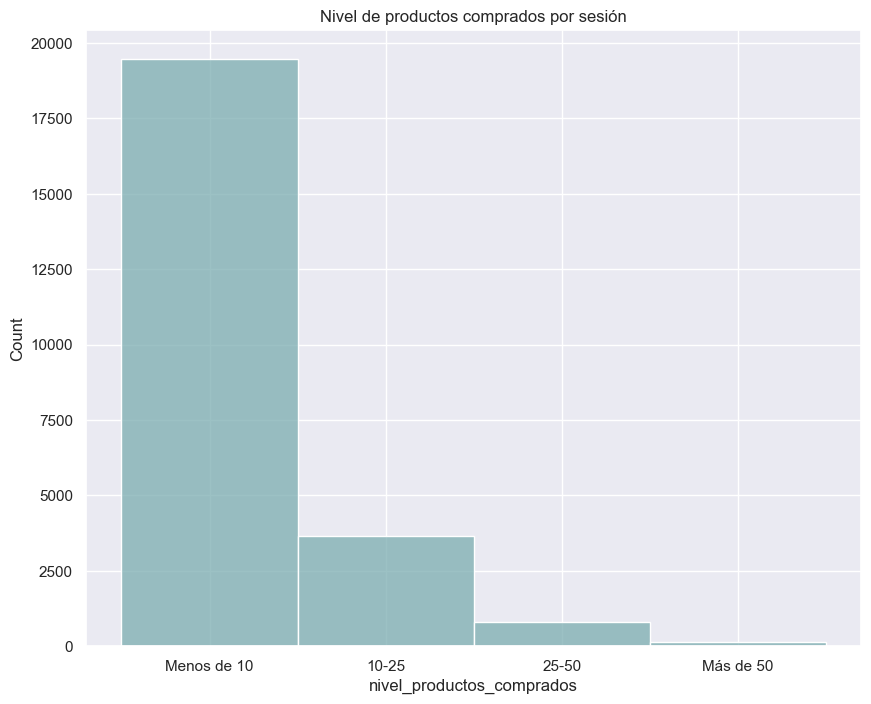

In [516]:
plt.figure(figsize=(10, 8))
sns.histplot(data=cliente, x='nivel_productos_comprados', bins=30, color='#7BADB0', 
             stat='count').set(title='Nivel de productos comprados por sesión');

In [517]:
cliente1 = cliente.sort_values('n_products', ascending=False)

In [518]:
cliente1.to_excel('cliente.xlsx', index=False, encoding='utf-8')

Podemos sacar varias conclusiones del nivel de compra por sesión: 
- En la mayoría de las sesiones se compran menos de 10 productos (19462 en total)
    - De hecho, en 13019 sesiones se compraron menos de 5 productos
    Esto tiene sentido pues al ser una tienda de ropa de maternidad pueden comprarse varios productos en conjunto, pero no es normal comprar muchos ya que son para uso propio y es una ropa especialmente adaptada para el embarazo que no se usará tras el parto. 
- En unas 3649 sesiones se compraron entre 10 y 25 productos
- En 779 sesiones se compraron entre 25 y 50 productos
- Por último, en 136 sesiones los clientes compraron más de 50 productos, teniendo algunos que compraron hasta 195, 192 y 185 productos. Estos últimos podrían tratarse de otros 

Considerando que cada ID representa la sesión y no el cliente, esto nos limita analizar la frecuencia de compra y los tipos de cliente. Por ende se recomienda a la marca incluir una variable identificativa del cliente. Teniendo en cuenta que la frecuencia de compra en ropa de maternidad no será especialmente alta (las mujeres pueden comprar durante el embarazo más de una vez o repetir en futuros embarazos), la retención de clientes se vuelve una tarea mucho más dificil. 

Comprendiendo los patrones de compra de ropa de maternidad, se recomienda centrar los esfuerzos de marketing en la captación de primeros clientes, a través de campañas, posicionamiento SEO, planes de suscripción y otras estrategias. 

In [519]:
#vamos a localizar cuál es el cliente que ha comprado tantos productos
cliente[(cliente['n_products']==195)]

ID  n_products  spend nivel_productos_comprados
22432  22433         195   8089                 Más de 50

In [520]:
ID_22433 = df[(df['session_ID']==22433)]
ID_22433

year  month  day  clics  country  session_ID  category clothing_code  \
153571  2008      8    3      1       29       22433         1            A1   
153572  2008      8    3      2       29       22433         1            A2   
153573  2008      8    3      3       29       22433         1            A3   
153574  2008      8    3      4       29       22433         1            A4   
153575  2008      8    3      5       29       22433         1            A6   
...      ...    ...  ...    ...      ...         ...       ...           ...   
153761  2008      8    3    191       29       22433         3           C55   
153762  2008      8    3    192       29       22433         3           C56   
153763  2008      8    3    193       29       22433         3           C57   
153764  2008      8    3    194       29       22433         3           C58   
153765  2008      8    3    195       29       22433         3           C59   

        colour  location  model_photography  price  overpriced  page  \
153571       8         1                  1     28           2     1   
153572       3         1                  1     43           2     1   
153573       3         1                  1     72           1     1   
153574       3         2                  2     38           2     1   
153575       3         2                  1     43           2     1   
...        ...       ...                ...    ...         ...   ...   
153761      13         1                  1     48           1     4   
153762       6         1                  2     57           1     4   
153763       5         1                  2     33           2     4   
153764      14         2                  2     48           1     4   
153765       5         2                  2     52           1     4   

             date day_week  
153571 2008-08-03  domingo  
153572 2008-08-03  domingo  
153573 2008-08-03  domingo  
153574 2008-08-03  domingo  
153575 2008-08-03  domingo  
...           ...      ...  
153761 2008-08-03  domingo  
153762 2008-08-03  domingo  
153763 2008-08-03  domingo  
153764 2008-08-03  domingo  
153765 2008-08-03  domingo  

[195 rows x 16 columns]

In [521]:
ID_22433.describe()

year  month    day       clics  country  session_ID    category  \
count   195.0  195.0  195.0  195.000000    195.0       195.0  195.000000   
mean   2008.0    8.0    3.0   98.000000     29.0     22433.0    2.876923   
std       0.0    0.0    0.0   56.435804      0.0         0.0    1.091311   
min    2008.0    8.0    3.0    1.000000     29.0     22433.0    1.000000   
25%    2008.0    8.0    3.0   49.500000     29.0     22433.0    2.000000   
50%    2008.0    8.0    3.0   98.000000     29.0     22433.0    3.000000   
75%    2008.0    8.0    3.0  146.500000     29.0     22433.0    4.000000   
max    2008.0    8.0    3.0  195.000000     29.0     22433.0    4.000000   

           colour    location  model_photography       price  overpriced  \
count  195.000000  195.000000         195.000000  195.000000  195.000000   
mean     6.676923    3.158974           1.338462   41.482051    1.497436   
std      4.257586    1.671581           0.474404   12.075511    0.501280   
min      1.000000    1.000000           1.000000   18.000000    1.000000   
25%      3.000000    2.000000           1.000000   33.000000    1.000000   
50%      6.000000    3.000000           1.000000   38.000000    1.000000   
75%     10.000000    5.000000           2.000000   48.000000    2.000000   
max     14.000000    6.000000           2.000000   82.000000    2.000000   

             page  
count  195.000000  
mean     2.128205  
std      1.125604  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      5.000000

El usuario compró el día 3 de agosto 195 productos desde Polonia

### Categoría

Sabemos que hay cuatro categorías, que son pantalones, faldas, blusas y productos en rebajas
- (1) trousers
- (2) skirts
- (3) blouses
- (4) sale

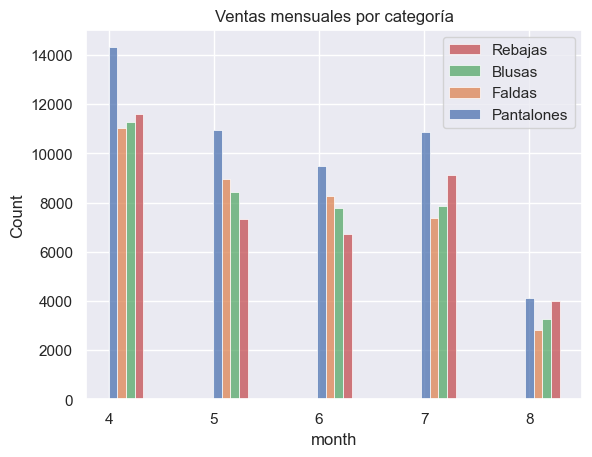

In [522]:
sns.histplot(data=df, x='month', color='darkblue', binwidth= 0.33, palette = 'deep',
             multiple='dodge', hue='category', linewidth=0.5).set(title='Ventas mensuales por categoría')
plt.legend(['Rebajas', 'Blusas', 'Faldas', 'Pantalones'])

- Como vimos antes, la categoría que más se vende son pantalones
- Las ventas de rebajas suben en abril, julio y agosto
- Resulta curioso que cuando suben las ventas de productos en oferta también lo hacen la venta de blusas

<AxesSubplot:xlabel='category', ylabel='price'>

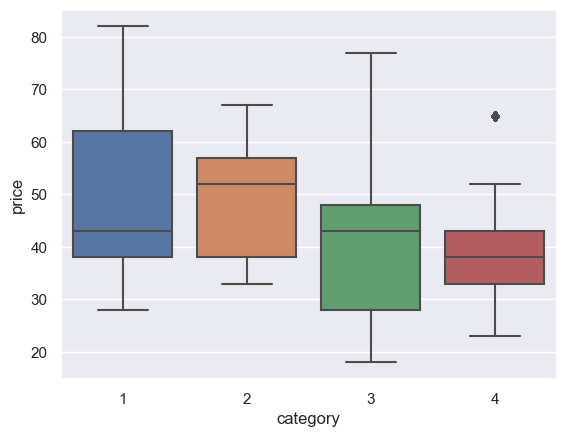

In [523]:
sns.boxplot( x=df["category"], y=df["price"] )

- Como podemos ver, los pantalones tienen precios más altos, al igual que las blusas (estos son los más comprados)
- Aunque el precio maximo de algunas blusas es más alto, el precio de la mayoría de vendidos no supera al precio medio vendido de faldas
- De hecho, respecto a la mayoría de productos vendidos de una categoría, se suelen vender las faldas y blusas más caras dentro de la categoria
- Por el contrario, se suelen venden los pantalones más baratos dentro de su categoría (aunque se vendan todos)
- Como es de esperar, las rebajas (4) tienen precios más bajos. Algunos productos vendidos estaban fuera del precio normal de rebajas

### Producto e ingresos

In [524]:
df.columns

Index(['year', 'month', 'day', 'clics', 'country', 'session_ID', 'category',
       'clothing_code', 'colour', 'location', 'model_photography', 'price',
       'overpriced', 'page', 'date', 'day_week'],
      dtype='object')

In [525]:
df.clothing_code.describe()
#Hay un total de 217 productos

count     165474
unique       217
top           B4
freq        3579
Name: clothing_code, dtype: object

In [526]:
#Vamos a ver cual es el ingreso total recibido 
df.price.sum()

7248176

El total de ingresos fue de 7,248,176 dólares. 

In [527]:
#Vamos a ver los ingresos por mes
df.groupby('month')['price'].sum()

month
4    2100924
5    1562573
6    1411981
7    1547518
8     625180
Name: price, dtype: int64

In [528]:
ingresomensual = {'month': [4, 5, 6, 7, 8],
        'sales': [2100924, 1562573, 1411981, 1547518, 625180]}

# create a DataFrame from the dictionary
ingresomensual = pd.DataFrame(ingresomensual)


[Text(0, 0.5, 'Sales')]

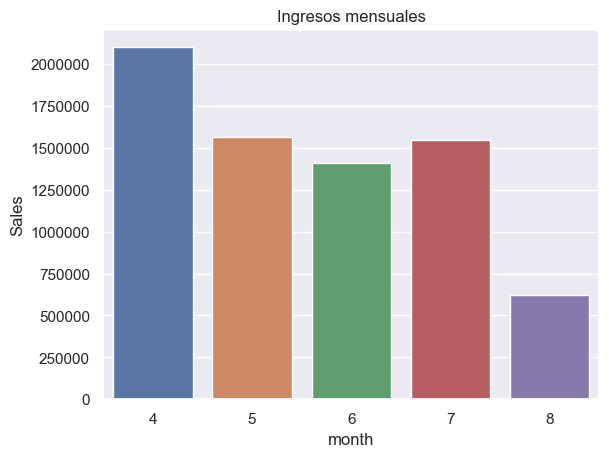

In [529]:
ax = sns.barplot(x='month', y='sales', data=ingresomensual, palette='deep')
ax.set(title='Ingresos mensuales')

# format the Y axis to display values in millions
ax.ticklabel_format(style='plain', axis='y', useOffset=False, )
ax.set(ylabel='Sales')


Proseguimos con el análisis de los productos

In [530]:
#En primer lugar, creo un dataset que esté agrupado por el código de productos

# agrupar los datos por código de producto
producto = df.groupby('clothing_code').agg({
    'price': 'first',
    'overpriced': 'first',
    'colour': 'first',
    'location': 'first',
    'page': 'first',
    'model_photography': 'first',
    'category': 'first',
    'clothing_code': 'count'
})

# renombrar la columna clothing_code por num_ventas
producto = producto.rename(columns={'clothing_code': 'num_ventas'})

In [531]:
producto

price  overpriced  colour  location  page  model_photography  \
clothing_code                                                                 
A1                28           2       8         1     1                  1   
A10               38           2       3         4     1                  1   
A11               62           1       3         4     1                  1   
A12               38           2       2         4     1                  1   
A13               28           2       1         5     1                  1   
...              ...         ...     ...       ...   ...                ...   
P8                28           2       2         3     1                  1   
P80               28           2       7         3     5                  1   
P81               43           1       4         3     5                  2   
P82               48           1       6         4     5                  2   
P9                23           2       4         3     1                  2   

               category  num_ventas  
clothing_code                        
A1                    1        2265  
A10                   1        2280  
A11                   1        2789  
A12                   1        2010  
A13                   1        1577  
...                 ...         ...  
P8                    4         661  
P80                   4         222  
P81                   4         202  
P82                   4         725  
P9                    4         612  

[217 rows x 8 columns]

In [532]:
producto.reset_index(inplace=True)

In [533]:
producto.index

RangeIndex(start=0, stop=217, step=1)

In [534]:
producto.index = producto.index + 1
producto

clothing_code  price  overpriced  colour  location  page  \
1              A1     28           2       8         1     1   
2             A10     38           2       3         4     1   
3             A11     62           1       3         4     1   
4             A12     38           2       2         4     1   
5             A13     28           2       1         5     1   
..            ...    ...         ...     ...       ...   ...   
213            P8     28           2       2         3     1   
214           P80     28           2       7         3     5   
215           P81     43           1       4         3     5   
216           P82     48           1       6         4     5   
217            P9     23           2       4         3     1   

     model_photography  category  num_ventas  
1                    1         1        2265  
2                    1         1        2280  
3                    1         1        2789  
4                    1         1        2010  
5                    1         1        1577  
..                 ...       ...         ...  
213                  1         4         661  
214                  1         4         222  
215                  2         4         202  
216                  2         4         725  
217                  2         4         612  

[217 rows x 9 columns]

In [535]:
producto.num_ventas.describe()

count     217.000000
mean      762.552995
std       614.330174
min         1.000000
25%       356.000000
50%       590.000000
75%       949.000000
max      3579.000000
Name: num_ventas, dtype: float64

- La media de ventas por producto es de 762, el percentil 50 es 590 
- El mínimo es 1 y el máximo es 3579 ventas por un producto

In [536]:
producto[(producto['num_ventas']==3579)]
#El producto más vendido corresponde al código B4

clothing_code  price  overpriced  colour  location  page  \
71            B4     52           1      10         2     1   

    model_photography  category  num_ventas  
71                  1         2        3579

In [537]:
producto[(producto['clothing_code']=='B4')]
#Se trata de una falda, en la página 1 del e-commerce y de color verde oliva

clothing_code  price  overpriced  colour  location  page  \
71            B4     52           1      10         2     1   

    model_photography  category  num_ventas  
71                  1         2        3579

In [538]:
producto['nivel_venta'] = pd.cut(producto['num_ventas'],bins=[0,100,500,1000,1000000],labels=["Menos de 100", "100-500","500-1000","Más de 1000"])

In [539]:
producto

clothing_code  price  overpriced  colour  location  page  \
1              A1     28           2       8         1     1   
2             A10     38           2       3         4     1   
3             A11     62           1       3         4     1   
4             A12     38           2       2         4     1   
5             A13     28           2       1         5     1   
..            ...    ...         ...     ...       ...   ...   
213            P8     28           2       2         3     1   
214           P80     28           2       7         3     5   
215           P81     43           1       4         3     5   
216           P82     48           1       6         4     5   
217            P9     23           2       4         3     1   

     model_photography  category  num_ventas  nivel_venta  
1                    1         1        2265  Más de 1000  
2                    1         1        2280  Más de 1000  
3                    1         1        2789  Más de 1000  
4                    1         1        2010  Más de 1000  
5                    1         1        1577  Más de 1000  
..                 ...       ...         ...          ...  
213                  1         4         661     500-1000  
214                  1         4         222      100-500  
215                  2         4         202      100-500  
216                  2         4         725     500-1000  
217                  2         4         612     500-1000  

[217 rows x 10 columns]

<AxesSubplot:xlabel='nivel_venta', ylabel='Count'>

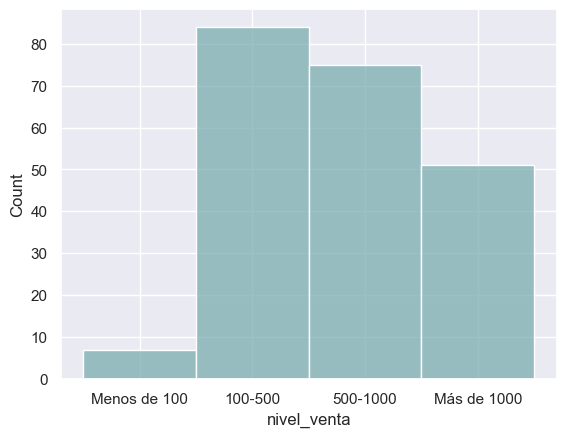

In [540]:
sns.histplot(data=producto, x='nivel_venta', color='#7BADB0', bins=30, )

In [541]:
producto.groupby('nivel_venta')['nivel_venta'].count()

nivel_venta
Menos de 100     7
100-500         84
500-1000        75
Más de 1000     51
Name: nivel_venta, dtype: int64

- 7 productos vendieron menos de 100 unidades
- 84 productos vendieron entre 100 y 500 unidades 
- 75 productos vendieron entre 500 y 1000 unidades
- 51 productos vendieron más de 1000 unidades

Vamos a estudiar brevemente los productos que vendieron menos de 100 unidades y los que vendieron más de 1000 para entender esta diferencia, diminuir gastos y mejorar el rendimiento en términos de ventas. Seguir vendiendo o no los productos con menos de 100 unidades dependerá de la rentabilidad y la demanda de los mismos, así como los costes asociados a su producción y promoción.

In [542]:
producto[(producto['nivel_venta']=='Menos de 100')]

clothing_code  price  overpriced  colour  location  page  \
150           P22     52           1      12         2     2   
156           P28     33           2      12         4     2   
160           P31     33           2       2         5     2   
161           P32     43           1       3         5     2   
185           P54     33           2      14         1     4   
198           P66     43           1       9         4     4   
212           P79     52           1       2         3     5   

     model_photography  category  num_ventas   nivel_venta  
150                  1         4           2  Menos de 100  
156                  2         4           1  Menos de 100  
160                  2         4          76  Menos de 100  
161                  2         4          98  Menos de 100  
185                  2         4           1  Menos de 100  
198                  2         4          46  Menos de 100  
212                  1         4           2  Menos de 100

- Todos son productos en rebajas
- La mayoría tienen fotos de perfil
- Los precios rondan entre los 33 y los 52 euros
- Los colores, localización y página varían. 

Es interesante el resultado ya que los productos P22, P28, P54 Y P79 han tenido 1 o 2 ventas solo. Vamos a quedarnos solo con estos para analizarlos

In [543]:
producto[(producto['num_ventas'] < 3)]

clothing_code  price  overpriced  colour  location  page  \
150           P22     52           1      12         2     2   
156           P28     33           2      12         4     2   
185           P54     33           2      14         1     4   
212           P79     52           1       2         3     5   

     model_photography  category  num_ventas   nivel_venta  
150                  1         4           2  Menos de 100  
156                  2         4           1  Menos de 100  
185                  2         4           1  Menos de 100  
212                  1         4           2  Menos de 100

Buscando similitudes entre los mismos: 
- Todos son productos en rebajas
- La localización y la página son diferentes
- Coincide que los dos más caros tienen fotografía de frente y los dos más baratos tienen fotografía de perfil
- Los colores son blanco negro y rojo, lo cual llama la atención porque blanco y negro son los colores más vendidos. 

Viendo las mínimas ventas de estos productos, es posible que no tenga sentido invertir más recursos en estos productos para aumentar sus ventas. Podría ser conveniente enfocarlos en productos más rentables. 

Para valorar esto deberíamos conocer más detalles del producto, como calidad, tela, fotografías, modelo, etc. Además, sería reocmendable recopilar datos de satisfacción del cliente a través de encuestas, comentarios en redes sociales o correos electrónicos, entre otros. 

In [544]:
productosmásvendidos = producto[(producto['nivel_venta']=='Más de 1000')]

In [545]:
productosmásvendidos.head(5)

clothing_code  price  overpriced  colour  location  page  model_photography  \
1            A1     28           2       8         1     1                  1   
2           A10     38           2       3         4     1                  1   
3           A11     62           1       3         4     1                  1   
4           A12     38           2       2         4     1                  1   
5           A13     28           2       1         5     1                  1   

   category  num_ventas  nivel_venta  
1         1        2265  Más de 1000  
2         1        2280  Más de 1000  
3         1        2789  Más de 1000  
4         1        2010  Más de 1000  
5         1        1577  Más de 1000

[Text(0.5, 1.0, 'Precio de los 1000 productos más vendidos')]

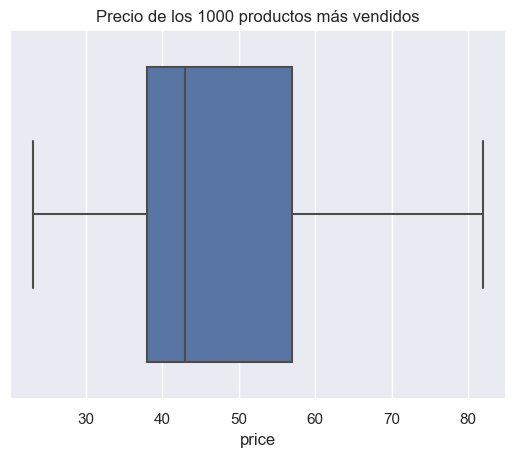

In [546]:
sns.boxplot(x=productosmásvendidos["price"]).set(title='Precio de los 1000 productos más vendidos')

[Text(0.5, 1.0, 'Cantidad de productos caros o baratos')]

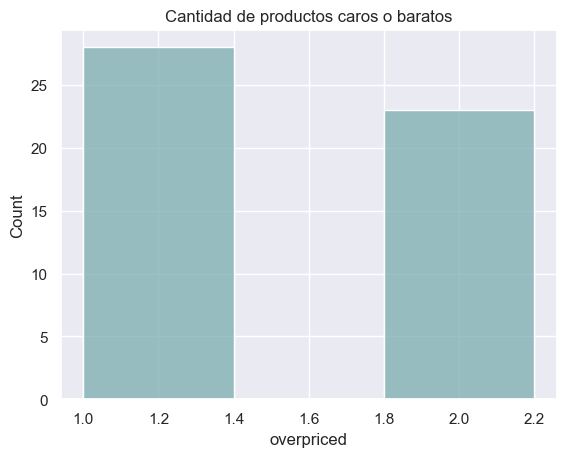

In [547]:
sns.histplot(data=productosmásvendidos, x='overpriced', bins=2,color='#7BADB0', 
             binwidth= 0.4).set(title='Cantidad de productos caros o baratos')

#Donde 1 es igual a sí, y 2 equivale a no
#No hay una gran diferencia

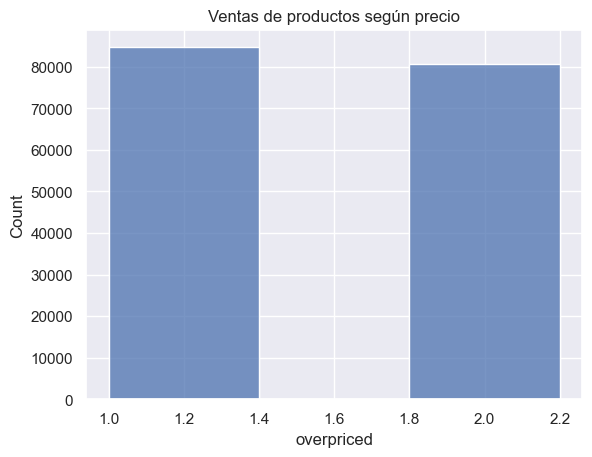

In [548]:
sns.histplot(data=df, x='overpriced', bins=2, 
              binwidth= 0.4).set(title='Ventas de productos según precio');

[Text(0.5, 1.0, 'Ventas de productos según precio')]

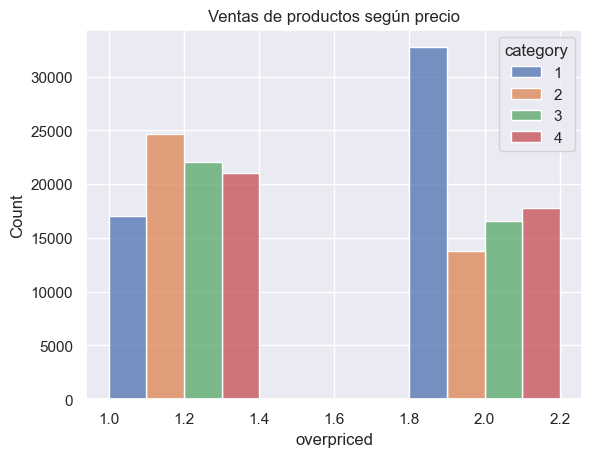

In [549]:
sns.histplot(data=df, x='overpriced', bins=2, hue='category', palette='deep',
             multiple='dodge', binwidth= 0.4).set(title='Ventas de productos según precio')


In [550]:
productosmásvendidos.groupby('colour')['colour'].count()

#Los colores más vendidos son negro y azul

colour
1      3
2      8
3     13
4      4
6      4
7      2
8      1
9      3
10     1
11     2
12     4
13     3
14     3
Name: colour, dtype: int64

[Text(0.5, 1.0, 'Página en la web de los productos más vendidos')]

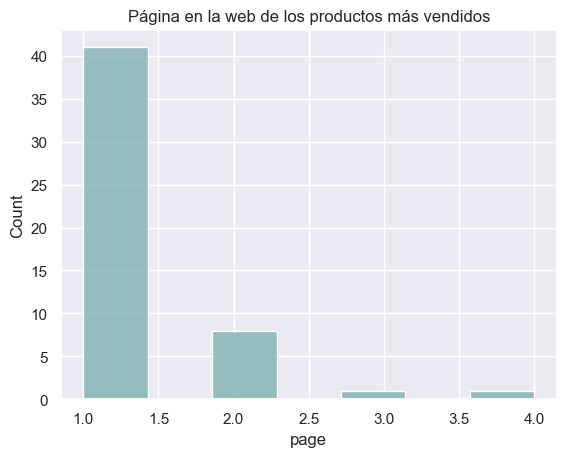

In [551]:
sns.histplot(data=productosmásvendidos, x='page',color='#7BADB0').set(title='Página en la web de los productos más vendidos')

[Text(0.5, 1.0, 'Fotografía de los productos más vendidos')]

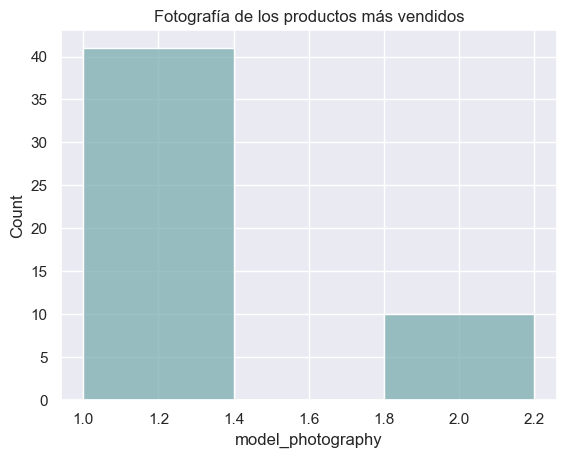

In [552]:
sns.histplot(data=productosmásvendidos, x='model_photography', color='#7BADB0', bins=2, stat='count',
             binwidth= 0.4).set(title='Fotografía de los productos más vendidos')

[Text(0.5, 1.0, 'Localización en la web de los productos más vendidos')]

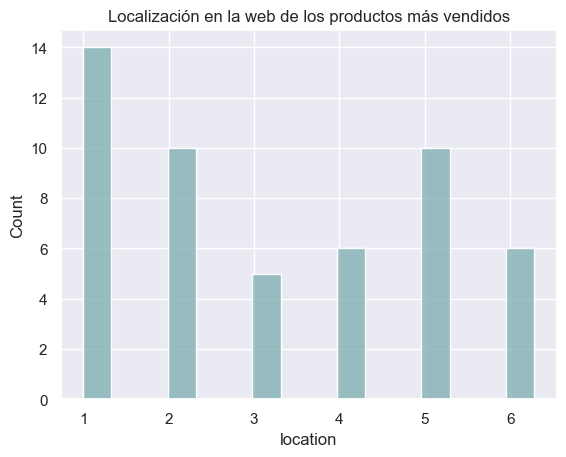

In [553]:
sns.histplot(data=productosmásvendidos, x='location', bins=6, stat='count',color='#7BADB0',
             binwidth= 0.33).set(title='Localización en la web de los productos más vendidos')

Los productos con más de 1000 ventas eran esencialmente pantalones y faldas, en la página 1 de la web, con fotografía de frente y de color negro y azul. Su precio se encontraba en el rango de 38 a 58 euros aproximadamente. 

Por el contrario, los productos que se vendieron menos eran principalmente de rebajas, con foto de perfil y cuyo precio rondaba entre los 33 y los 52 euros y los colores eran blanco, negro y rojo. 

Que los productos menos vendidos sean de rebajas puede deberse a que sean de una temporada anterior o menos atractivos para el cliente y por eso estén en rebajas. Sin embargo, el precio o los colores no parece ser algo condicionante ya que coincide en los productos más y menos vendidos. 

### Precio

In [554]:
df.price.describe()

count    165474.000000
mean         43.802507
std          12.548131
min          18.000000
25%          33.000000
50%          43.000000
75%          52.000000
max          82.000000
Name: price, dtype: float64

- El precio máximo de un producto es 82 dólares
- El percentil 50 es 43, muy parecido a la media
- El precio más bajo es de 18 euros 

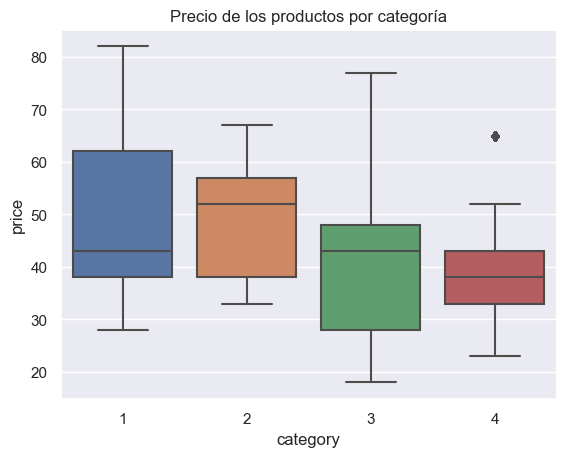

In [555]:
sns.boxplot(x=df["category"],y=df['price'],
            palette='deep').set(title='Precio de los productos por categoría');

Observando los precios de las diferentes categorías: 
- Los pantalones y las blusas son las categorías con precios más altos totales.
- Las rebajas son los productos con precios más bajos en ventas generales. 
- Las faldas son la  categoría con mayor variabilidad de precios, siendo sus máximos casí como los pantalones y sus mínimos los precios más bajos de todas las categorías. 
- Cuando nos fijamos en el percentil 75, los productos vendidos dentro de la categoría pantalones se vendieron entre 38 y 62 dólares aproximadamente, las blusas entre 38 y 58 dólares, las faldas entre 28 y 48 dólares y los productos en rebajas entre 33 y 42 dólares.
- Sin embargo, según el percentil 50, los productos vendidos dentro de la categoría pantalones se vendieron en 42 dólares, al igual que faldas. Las blusas se vendieron en 52 dólares y los productos en rebajas en 38 dólares. 


In [556]:
df.overpriced.describe()

count    165474.000000
mean          1.488167
std           0.499861
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: overpriced, dtype: float64

In [557]:
df.groupby('overpriced')['overpriced'].count()

overpriced
1    84695
2    80779
Name: overpriced, dtype: int64

In [558]:
producto.groupby('overpriced')['overpriced'].count()

overpriced
1    106
2    111
Name: overpriced, dtype: int64

De los 217 productos del e-commerce, 106 están fuera del precio medio de su categoría y 111 no lo están. Es decir, más o menos 50%. 
De los productos vendidos por unidades, hay 84.695 unidades vendidas que estaban fuera de la media de precios de su categoría y 80.779 que no lo estaban. Hay ligeramente más ventas de los productos cuyo precio se encuentra por encima o por debajo del precio medio de su categoría. 

Por ende, vamos a analizar si los productos que se venden son más caros o más baratos que el precio medio por categoría. 



[Text(0.5, 1.0, 'Precio de los productos')]

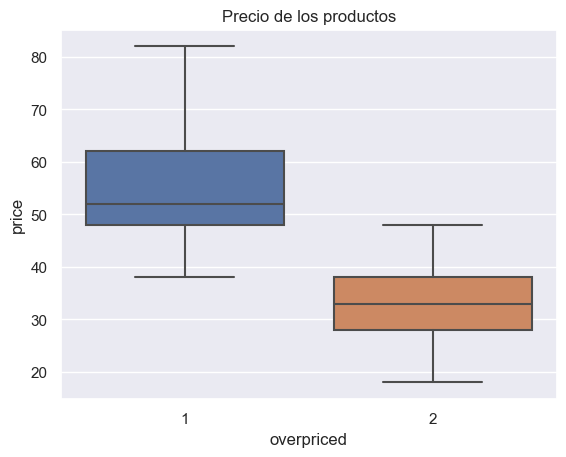

In [559]:
sns.boxplot(x=df["overpriced"],y=df['price'],palette='deep').set(title='Precio de los productos')

El boxplot es la mejor gráfica para visualizar la diferencia de precios entre aquellos que se encuentran fuera del precio medio o no. La conclusión que podemos sacar de esto es que los productos más vendidos tienen un precio superior al medio de su categoría. Esto puede deberse a la calidad de sus productos, la tela, las características del producto o fotografía y modelo. Para evaluar con precisión la variación de precios de los productos deberíamos tener las variables mencionadas en cuenta. 

Sin embargo, basándonos en los datos proporcionados, se puede inferir que la marca tiene un amplio margen de mejora en la rentabilidad de sus ventas a través de una estrategia de precios. Para ello se recomienda seguir los siguientes pasos: 
- Analizar los precios de la competencia: Es importante conocer los precios del mercado para evitar pérdida de clientes a la vez qeu se optimizan las ventas y reducen gastos. 
- Analizar la elasticidad del precio: Para ello se recomienda un test A/B probando diferentes precios de producto para ver como reaccionan los clientes a cada precio. Por ejemplo, se podrían aumentar los precios de los pantalones y blusas en un 10% en el grupo A y mantener los precios normales en el grupo B. Luego compararían las ventas y la rentabilidad en ambos grupos para determinar qué precios son los más efectivos para cada categoría.
- Mejora de la calidad: deberían estudiarse los productos más vendidos con precios por encima de su categoría y evaluar si la calidad es más alta que la media en su categoría. Se podría lanzar una gama de mayor calidad con precios más altos y realizar promociones así como test A/B viendo la acogida por los clientes. 


### Fotografía

Explicación de las variables: 

LOCATION: photo location on the page, the screen has been divided into six parts:

- 1-top left
- 2-top in the middle
- 3-top right
- 4-bottom left
- 5-bottom in the middle
- 6-bottom right

MODEL_PHOTOGRAPHY: 
- 1-en face (de frente)
- 2-profile (de perfil)

In [560]:
df.columns

Index(['year', 'month', 'day', 'clics', 'country', 'session_ID', 'category',
       'clothing_code', 'colour', 'location', 'model_photography', 'price',
       'overpriced', 'page', 'date', 'day_week'],
      dtype='object')

In [561]:
df.groupby('model_photography')['model_photography'].count()

model_photography
1    122439
2     43035
Name: model_photography, dtype: int64

Como cada fila representa una venta de un producto, contando el número de filas que tienen cada categoría de foto podemos sacar el número de productos vendidos con cada tipo de fotografía. Por ende, podemos concluir que hay el tripe el productos vendidos con fotografías de frente que de perfil. 

Si bien sabemos que hay una mayor venta de productos con fotos de frente, esto no implica la causalidad del tipo de fotografía en el número de ventas. Debemos estudiar a fondo la relación con las demás variables ya que el tipo de fotografía puede depender de la categoría de producto, la página donde se encuentre en la web o incluso su localización dentro de una misma página. 


In [562]:
#Por ejemplo, vamos a ver si varía el tipo de fotografía según su localización en la página
df.groupby('model_photography')['location'].value_counts()

model_photography  location
1                  1           27570
                   2           24575
                   4           20569
                   5           16801
                   3           16677
                   6           16247
2                  5           10982
                   2            8808
                   1            6962
                   4            6808
                   3            4979
                   6            4496
Name: location, dtype: int64

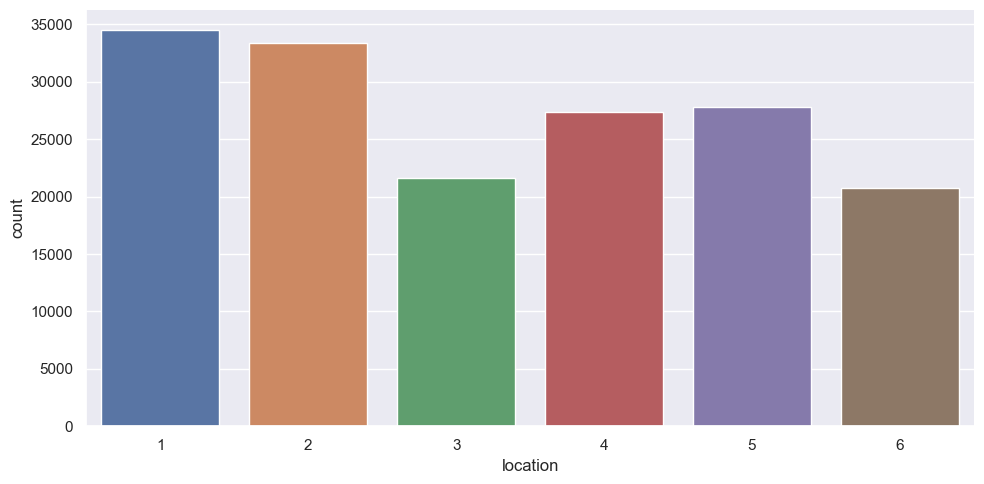

In [563]:
plotphotography = sns.catplot(data=df, x='location', kind='count', aspect=2)

Respecto a la localización podemos ver que: 
- Muchos más productos se vendieron en la parte izquierda y centro que derecha, teniendo en cuenta que 1, 2 y 3 corresponden a la parte superior y 4, 5 y 6 a la inferior. 
- Asimismo, más productos se vendieron en la parte superior siendo la localización superior izquierda y centro las que tuvieron mayores ventas. 

Vamos a analizar esta variable en conjunto con el tipo de fotografía.  

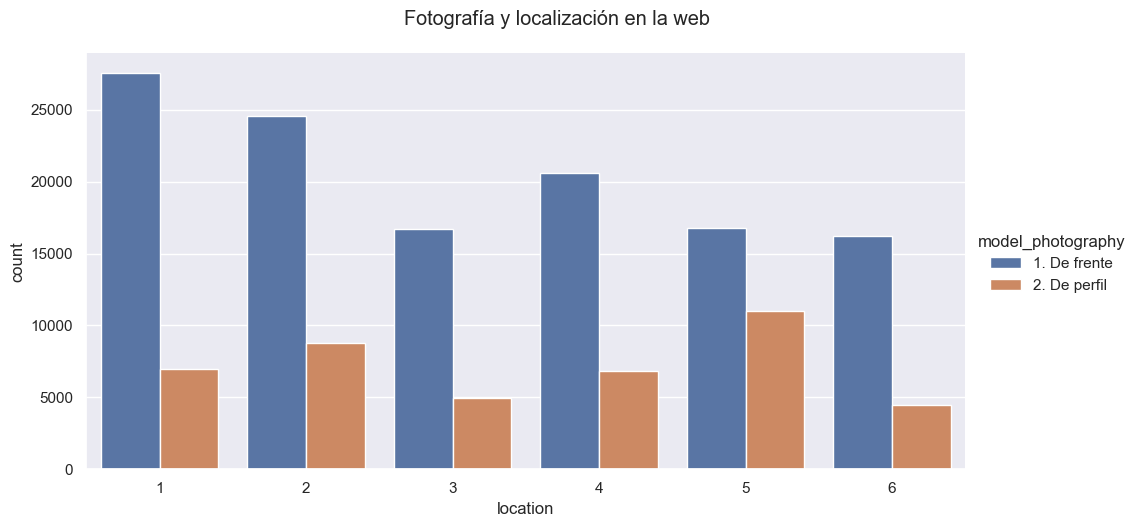

In [564]:
plotphotography = sns.catplot(data=df, x='location', kind='count', hue='model_photography', palette='deep', aspect=2)
plotphotography.fig.suptitle('Fotografía y localización en la web', y=1.05)
new_labels = ['1. De frente', '2. De perfil']
for t, l in zip(plotphotography._legend.texts, new_labels):
    t.set_text(l)

Conclusiones de las fotografías y localización en la web: 
- Podemos observar que la proporción de imágenes de frente es dispar y el porcentaje de unas y otras varía según la localización en la página.
- Según la gráfica, donde hay más imágenes de perfil es la parte inferior central de la página (5) y donde hay menos es en la parte parte inferior y superior derecha (3,6). 
- Por el contrario, las imágenes de frente se concentran en la parte superior izquierda y central de la página web, que coinciden con las mayores ventas de productos. 

El mayor número de ventas en productos de la parte superior de la página web tiene sentido pues esta zona es la que tiene mayor visibilidad y exposición en la web. Otra razón puede ser que aquí se encuentren ubicados los productos más populares o los más vendidos, y puede ser interpretado por el cliente como productos de moda o mayor calidad, que los hace más atractivos para comprar. Asímismo, el límite de tiempo o de interés del cliente puede hacer que en muchas ocasiones no se encuentren dispuestos a buscar productos navegando por toda la web, por lo que hacen clics en los primeros productos que ven. 

Sin embargo, es imposible realizar un análisis exhaustivo de la página web sin poder visualizarla y entender su estructura y funcionamiento. Por ende, aconsejamos al cliente contratar un servicio de asesoramiento web acompañando a este análisis de datos que integre recomendaciones SEO y UXUI. Esto es esencial para mejorar las ventas del e-commerce, ya que permitirá aumentar las visitas a la web y las conversiones de manera exponencial. Factores como las imágenes, los colores, la tipografía y la organización de la página web afectarán directamente al atractivo percibido por el cliente y la compra de unos productos u otros. Los productos localizados en la parte superior de la página pueden tener más ventas debido a su visibilidad, popularidad, calidad percibida y presentación adecuada. 

Es importante tener en cuenta el público objetivo para la disposición y estructura de la página web, ya que la edad puede ser un factor clave a la hora de establecer los tamaños de la letra, imágenes y facilidad de compra. Los botones de llamada a la acción (CTA) son cruciales para las ventas del e-commerce. Teniendo en cuenta que la ropa de maternidad no es una compra recurrente, deben centrarse en conseguir la llamada de atención y la venta a primeros clientes. Por ende, los CTA deben ser llamativos, atractivos y visibles en la web para que el cliente compre o añada el producto a la cesta.

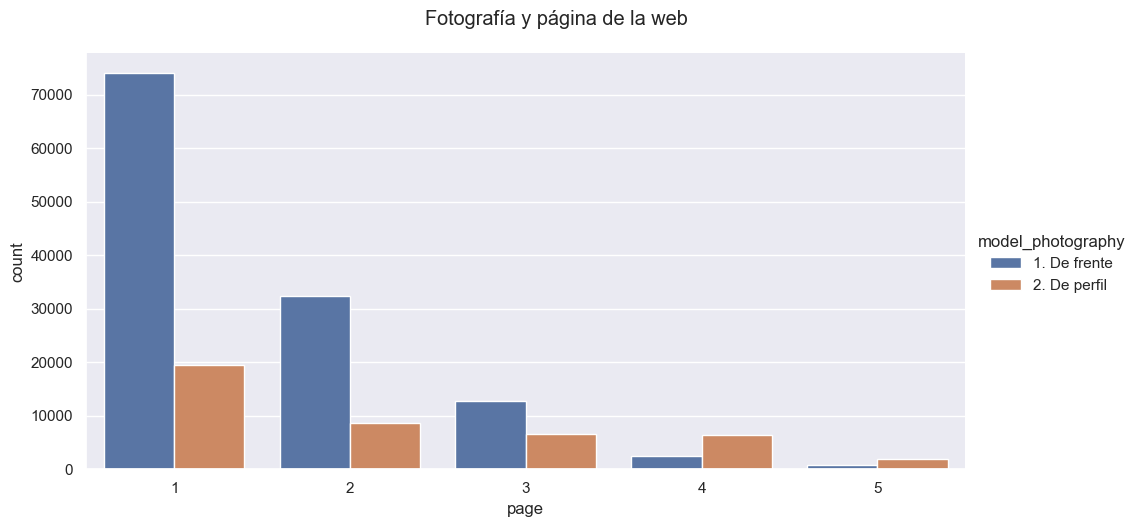

In [565]:
plotphotography = sns.catplot(data=df, x='page', kind='count', hue='model_photography', palette='deep', aspect=2)
plotphotography.fig.suptitle('Fotografía y página de la web', y=1.05)
new_labels = ['1. De frente', '2. De perfil']
for t, l in zip(plotphotography._legend.texts, new_labels):
    t.set_text(l)

- Hay muchos más productos en la página 1, donde también aparecen muchas más imágenes de frente.
- En la página 4 y 5, donde hay menores ventas, se usan más imágenes de perfil. Esto puede indicarnos que dichas páginas no están enfocadas a venta o son más de exposición. Quizás habría que cambiar las imágenes de estas páginas. 
- Como mencioné con anterioridad, el hecho de no conocer la estructura de la página web (cómo se organizan las diferentes páginas) resulta imposible realizar un análisis de ventas según las páginas y dar consejos de mejora de la web y experiencia de usuario.

### Clics

In [566]:
df.clics.describe()

count    165474.000000
mean          9.817476
std          13.478411
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         195.000000
Name: clics, dtype: float64

El máximo de clics por sesión es de 195
<br>
La media es de 9.8 clics por sesión, lo cual me resulta muy bajo (parece que las personas entran a la página y ya tienen localizado el producto)
<br>
El mínimo es 1, lo cual me parece imposible pues debes dar clic al producto y a comprar como mínimo (ya son dos clics)

In [567]:
#Compruebo si el número de clics es sumatorio para cada sesión o por producto
df[(df['session_ID']==24020)]

#Se añade un clic por cada producto

year  month  day  clics  country  session_ID  category clothing_code  \
165449  2008      8   13      1       29       24020         3           C14   
165450  2008      8   13      2       29       24020         3           C35   
165451  2008      8   13      3       29       24020         2            B4   
165452  2008      8   13      4       29       24020         2           B26   
165453  2008      8   13      5       29       24020         2           B31   

        colour  location  model_photography  price  overpriced  page  \
165449       9         5                  1     23           2     1   
165450       9         6                  1     50           1     2   
165451      10         2                  1     52           1     1   
165452      13         3                  1     57           1     2   
165453       9         5                  1     57           1     2   

             date   day_week  
165449 2008-08-13  miércoles  
165450 2008-08-13  miércoles  
165451 2008-08-13  miércoles  
165452 2008-08-13  miércoles  
165453 2008-08-13  miércoles

In [568]:
df[(df['session_ID']==22433)]

#¿El total de clics para comprar el producto para el cliente con la sesión 22433 es 195 o debo sumar todas las filas de clics?

year  month  day  clics  country  session_ID  category clothing_code  \
153571  2008      8    3      1       29       22433         1            A1   
153572  2008      8    3      2       29       22433         1            A2   
153573  2008      8    3      3       29       22433         1            A3   
153574  2008      8    3      4       29       22433         1            A4   
153575  2008      8    3      5       29       22433         1            A6   
...      ...    ...  ...    ...      ...         ...       ...           ...   
153761  2008      8    3    191       29       22433         3           C55   
153762  2008      8    3    192       29       22433         3           C56   
153763  2008      8    3    193       29       22433         3           C57   
153764  2008      8    3    194       29       22433         3           C58   
153765  2008      8    3    195       29       22433         3           C59   

        colour  location  model_photography  price  overpriced  page  \
153571       8         1                  1     28           2     1   
153572       3         1                  1     43           2     1   
153573       3         1                  1     72           1     1   
153574       3         2                  2     38           2     1   
153575       3         2                  1     43           2     1   
...        ...       ...                ...    ...         ...   ...   
153761      13         1                  1     48           1     4   
153762       6         1                  2     57           1     4   
153763       5         1                  2     33           2     4   
153764      14         2                  2     48           1     4   
153765       5         2                  2     52           1     4   

             date day_week  
153571 2008-08-03  domingo  
153572 2008-08-03  domingo  
153573 2008-08-03  domingo  
153574 2008-08-03  domingo  
153575 2008-08-03  domingo  
...           ...      ...  
153761 2008-08-03  domingo  
153762 2008-08-03  domingo  
153763 2008-08-03  domingo  
153764 2008-08-03  domingo  
153765 2008-08-03  domingo  

[195 rows x 16 columns]

El dataset explica que corresponde a la "secuencia" de clics durante la sesión por lo que considero que dentro de esa sesión el número total de clics es el máximo, no la suma de todos. Esto explica que el mínimo sea 1 ya que es una secuencia y van añadiendose. Esta variable no nos aporta mucha información ya que se añade uno por cada producto. Por ende, este número es igual a los productos comprados.

### Color

In [569]:
df.colour.describe()

count    165474.000000
mean          6.227655
std           4.235606
min           1.000000
25%           3.000000
50%           4.000000
75%           9.000000
max          14.000000
Name: colour, dtype: float64

COLOUR: colour of product
- 1. beige
- 2. black
- 3. blue
- 4. brown
- 5. burgundy
- 6. gray
- 7. green
- 8. navy blue
- 9. of many colors
- 10. olive
- 11. pink
- 12. red
- 13. violet
- 14. white

In [570]:
ncolours = df.groupby('colour')['colour'].value_counts()

In [571]:
ncolours

colour  colour
1       1          7785
2       2         29764
3       3         29259
4       4         16517
5       5          1667
6       6         17476
7       7          6876
8       8          2664
9       9         13531
10      10         3579
11      11         5292
12      12         8830
13      13         6295
14      14        15939
Name: colour, dtype: int64

- Los colores más vendidos son el negro y el azul. 
- Después, los colores más comunes son el el gris, el marrón y el blanco. 

Una tienda de ropa de maternidad tiene todo tipo de prendas adaptadas al embarazo para diferentes entornos. Muchas mujeres las compran para ir al trabajo. Asimismo, a medida que avanza la edad se suelen usar colores más neutros y serios, por lo que tiene sentido que estos sean los más demandados. 

### Conclusiones del análisis independiente de cada variable

En el mundo del e-commerce, el análisis de datos es esencial para el éxito de la empresa. Este permite a las empresas comprender mejor a sus clientes, identificar patrones de compra y descubrir tendencias de mercado. Entender cada variable es importante para entender el comportamiento del cliente en el mercado de la ropa de maternidad, así como para identificar áreas de mejora y oportunidades de negocio según la demanda y el contexto del país. En cualquier negocio es esencial aumentar la rentabilidad y satisfacción del cliente, y esto es posible a través de los datos. 

En el caso del e-commerce de ropa de maternidad analizado, se concluye que durante los meses de abril a agosto de 2008, se observó un patrón de ventas en el que los días más comunes fueron los primeros del mes. En términos semanales, los lunes son los que observan una mayor demanda, y dentro del fin de semana los domingos. Por ende, las campañas de marketing deben focalizarse en estos días y semanas del mes. 

El país con mayores ventas con diferencia fue Polonia, seguido por República Checa y Alemania. Deberían centrarse las campañas en estos tres país, investigar los patrones de compra concretos de República Checa y Alemania para adaptar el producto, web o packaging al país concreto. Asimismo, como fue mencionado anteriormente, una buena estraegia de marketing sería identificar países con mayor natalidad y demanda de productos de maternidad. Esto podría realizarse a través de Google Trends y buscadores de palabras clave como Ahrefs para mejorar el posicionamiento web del e-commerce en estos países y localizar huecos de mercado así como nuevos productos o formatos de venta adaptados a las necesidades del país. 

Respecto a la localización de la página, las fotografías y la página dentro de la web con mayores ventas, hemos podido detectar que las ventas se concentran en la página número 1 y 2 de la web. Asimismo los productos más vendidos se localizaban en la parte superior de la página web, ya que esta zona tiene mayor visibilidad y visitas. Dependiendo del interés y el tiempo con el que cuenten, los clientes pueden no estar dispuestos a navegar por toda la página en busca de un producto específico, por lo que es más probable que hagan clic en uno de los primeros productos que ven. Sería importante visualizar y entender la estructura de la página web para poder realizar recomendaciones específicas de UXUI según las ventas, ya que estas dependerán de factores como las imágenes, descripciones claras, productos en promoción, colores de la web así como el tipo de letra y disposición. Por otro lado las fotografías con mayores ventas son las de frente, siendo las de perfil menos comunes para la venta de ropa de maternidad, sobre todo para blusas y otras prendas que necesitas ver en su completo. 

A continuación, seguiremos en el siguiente notebook el análisis correlacional entre variablesm.